In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
tf.enable_eager_execution()
tf.VERSION

'1.12.0'

## Import data

In [2]:
import pathlib

DATADIR = 'D:/257_data/labeling_data'
data_root = pathlib.Path(DATADIR)

In [3]:
all_image_paths = list(data_root.glob('*/*/*/*/*.jpg'))
all_image_paths = [str(path) for path in all_image_paths]

all_xml_paths = list(data_root.glob('*/*/*/*/*.xml'))
all_xml_paths = [str(path) for path in all_xml_paths]

image_count = len(all_image_paths)
xml_count = len(all_xml_paths)
image_count + xml_count

3814

In [4]:
all_image_paths[:10] + all_xml_paths[:10]

['D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\100n.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\100p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\101n.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\101p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\102n.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\102p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\103n.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\103p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\104n.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\104p.jpg',
 'D:\\257_data\\labeling_data\\Annotations\\users\\kles90105\\257_data_set\\100n.xml',
 'D:\\257_data\\labeling_data\\Annotations\\users\\kles90105\\257_data_set\\100p.xml',
 'D:\\

In [5]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return image_rel
    

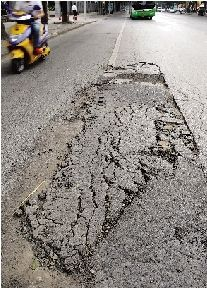

Images\users\kles90105\257_data_set\240p.jpg


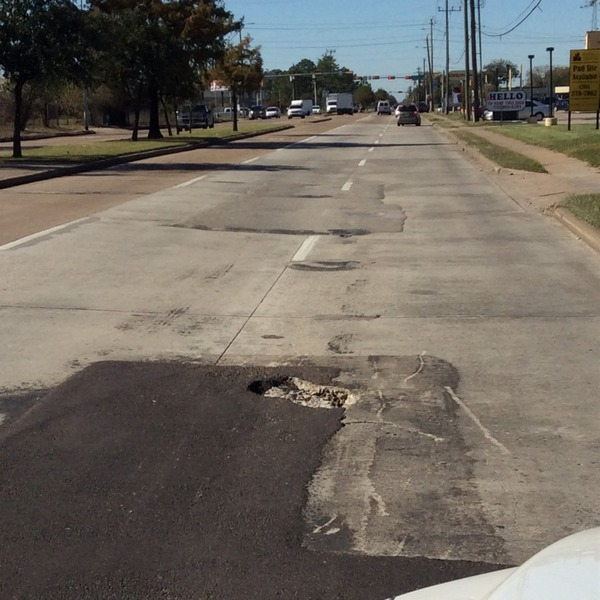

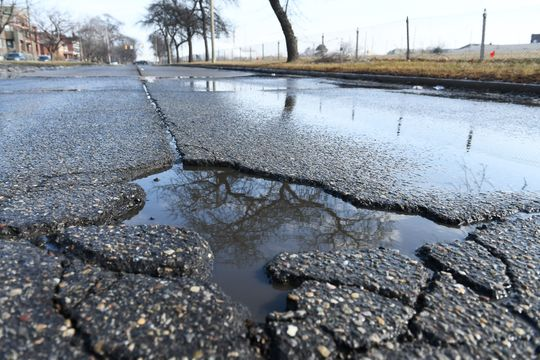

Images\users\kles90105\Positive Images\145.jpg
Images\users\kles90105\257_data_set\pothole_pos169.jpg


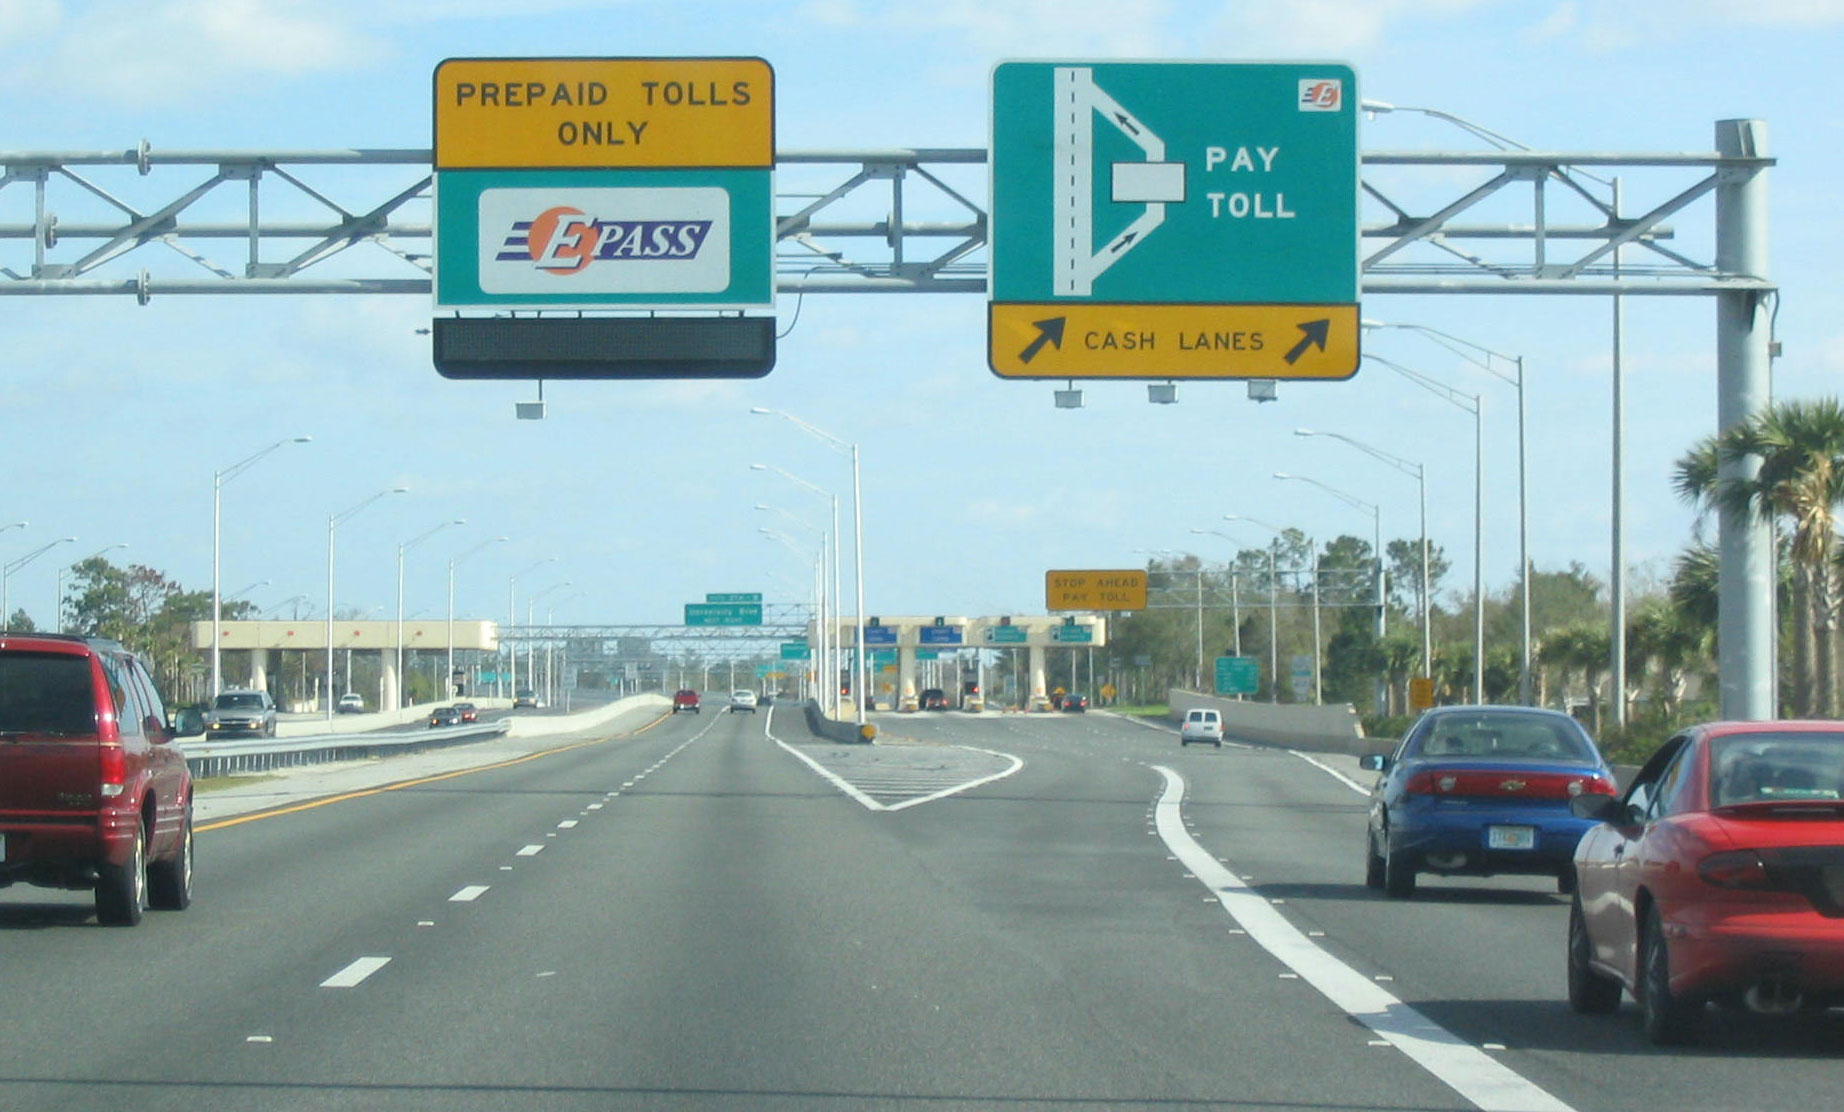

Images\users\kles90105\257_data_set\pothole_neg215.jpg


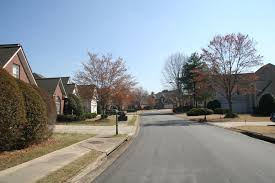

Images\users\kles90105\Negative Images\31.jpg


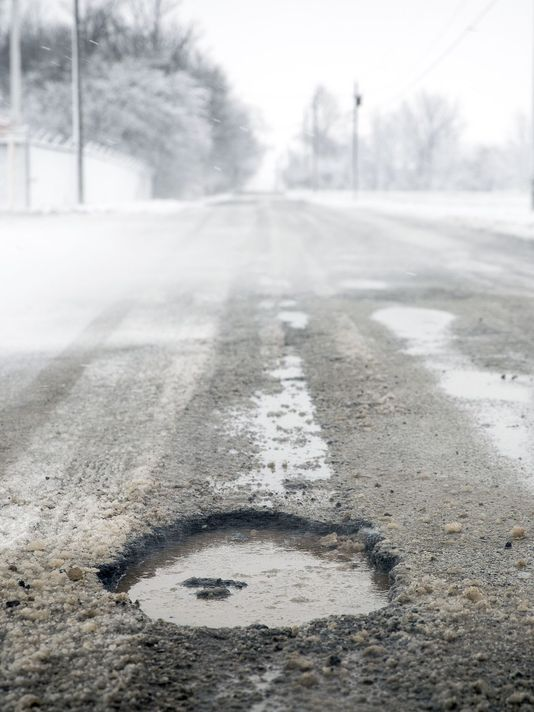

Images\users\kles90105\257_data_set\pothole_pos364.jpg


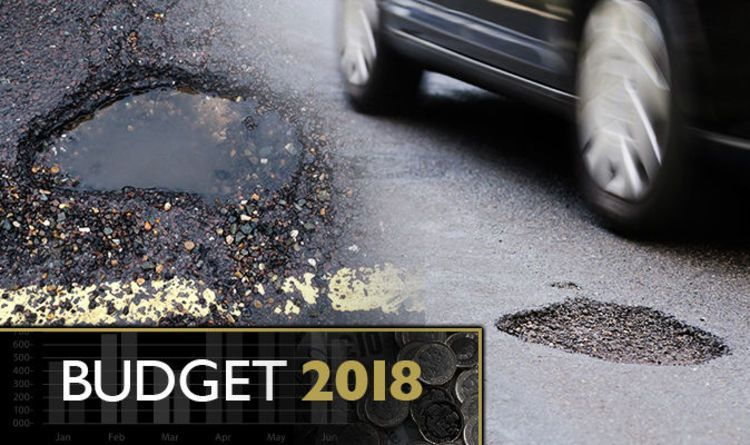

Images\users\kles90105\257_data_set\pwy0125.jpg


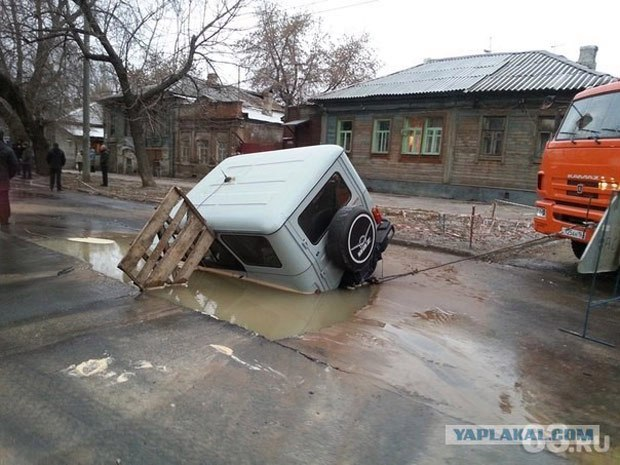

Images\users\kles90105\257_data_set\pwy0148.jpg


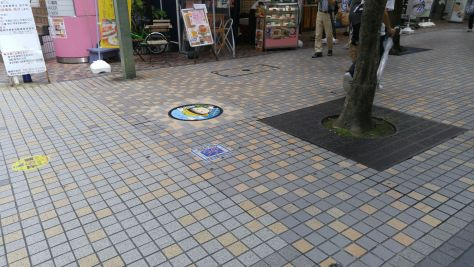

Images\users\kles90105\257_data_set\pothole_neg195.jpg


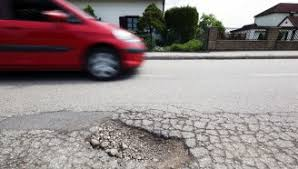

Images\users\kles90105\257_data_set\pothole_pos19.jpg


In [6]:
import random

for n in range(10):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))

## Prepare training data

In [7]:
import xml.etree.ElementTree as ET
import numpy as np
from array import *
from PIL import Image
import uuid

def xml_tree(x):
    for child in x:
        if(child.getchildren() == []):
            print(child.tag, ":", child.text)
        else:
            print(child.tag)
            xml_tree(child)

for i in range(len(all_image_paths)):
    tree = ET.parse(all_xml_paths[i])
    root = tree.getroot()
    xml_tree(root)
    print("")

    objs = root.findall("./object")

    x_list = []
    y_list = []
    for co in objs:
        print(co.find("./name").text)
        for node in co.findall("./polygon/pt"):
            print("point")
            children = node.getchildren()
            x = children[0].text
            y = children[1].text
            x_list.append(int(float(x)))
            y_list.append(int(float(y)))
            print(int(float(x)), int(float(y)))
        print("top-left", min(x_list), min(y_list))
        print("bottom-right", max(x_list), max(y_list))
        print()
    
        im = Image.open(all_image_paths[i])
        if(str(co.find("./name").text) == 'no pothole'):
            outfile = 'training_objects/pothole0-%s.png' % (str(uuid.uuid4()))
        elif(str(co.find("./name").text) == 'pothole'):
            if(co.find("./attributes").text == None):
                outfile = 'training_objects/pothole3-%s.png' % (str(uuid.uuid4()))
            else:
                outfile = 'training_objects/pothole%s-%s.png' % (str(co.find("./attributes").text), str(uuid.uuid4()))
        else:
            if(str(co.find("./name").text) == 'pothole1' or str(co.find("./name").text) == 'pothole2' 
               or str(co.find("./name").text) == 'pothole3' or str(co.find("./name").text) == 'pothole4'):
                outfile = 'training_objects/%s-%s.png' % (str(co.find("./name").text), str(uuid.uuid4()))
            elif(str(co.find("./name").text) == 'crack'):
                outfile = 'training_objects/pothole1-%s.png' % (str(uuid.uuid4()))
            else:
                outfile = 'training_objects/pothole0-%s.png' % (str(uuid.uuid4()))
        im.crop((min(x_list), min(y_list), max(x_list), max(y_list))).resize((640, 640)).save(outfile)
        print("Save as:", outfile)
        print()
        
        x_list = []
        y_list = []
    

filename : 100n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 800
ncols : 1200
object
name : paint
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:03:48
id : 0
polygon
username : anonymous
pt
x : 836
y : 508
pt
x : 825
y : 513
pt
x : 1052
y : 621
pt
x : 1089
y : 616
pt
x : 1074
y : 600

paint
point
836 508
point
825 513
point
1052 621
point
1089 616
point
1074 600
top-left 825 508
bottom-right 1089 621

Save as: training_objects/pothole0-9638cf66-371e-4cf1-b13d-dccf36a8943f.png

filename : 100p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 167
ncols : 250
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:01:53
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 25
y : 128
pt
x : 137
y : 128
pt
x : 137
y : 160
p

Save as: training_objects/pothole0-29d29834-deed-4239-89c9-110688abdc4c.png

filename : 106p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 169
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:35:47
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 69
y : 154
pt
x : 114
y : 154
pt
x : 114
y : 195
pt
x : 69
y : 195

pothole2
point
69 154
point
114 154
point
114 195
point
69 195
top-left 69 154
bottom-right 114 195

Save as: training_objects/pothole2-97ccdcf7-92a7-451a-b617-a7e9c4a03d5c.png

filename : 107n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 683
ncols : 1024
object
name : pattern
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:07:48
id : 0
type : bounding_box
polygon
username : anonymous
p

Save as: training_objects/pothole0-4838e4bc-b8d1-4fb5-8f71-f89a22ade772.png

filename : 112p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 165
ncols : 193
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:04:58
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 28
y : 47
pt
x : 149
y : 47
pt
x : 149
y : 111
pt
x : 28
y : 111

pothole4
point
28 47
point
149 47
point
149 111
point
28 111
top-left 28 47
bottom-right 149 111

Save as: training_objects/pothole4-d6e6cefd-f7cf-4e4a-8805-96530170551d.png

filename : 113n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 576
ncols : 768
object
name : shadow
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:10:15
id : 0
polygon
username : anonymous
pt
x : 407
y : 318
pt
x : 60

Save as: training_objects/pothole3-ea5e2d8e-acad-4f2a-b923-496f4e3030a6.png

pothole3
point
87 33
point
120 33
point
120 23
point
87 23
top-left 87 23
bottom-right 120 33

Save as: training_objects/pothole3-1162e98b-2a8d-4fff-8478-0e800d68ab93.png

pothole3
point
126 16
point
158 16
point
158 30
point
126 30
top-left 126 16
bottom-right 158 30

Save as: training_objects/pothole3-ac0f4125-b17a-47f6-9aa7-ad9388e9426e.png

pothole3
point
118 46
point
151 46
point
151 66
point
118 66
top-left 118 46
bottom-right 151 66

Save as: training_objects/pothole3-0e550f9c-f85f-4496-8c17-f632dd7e720e.png

pothole3
point
25 32
point
94 32
point
94 76
point
25 76
top-left 25 32
bottom-right 94 76

Save as: training_objects/pothole3-09e6c154-ab2f-4e6d-a467-799fae9b104f.png

pothole3
point
13 110
point
44 110
point
44 130
point
13 130
top-left 13 110
bottom-right 44 130

Save as: training_objects/pothole3-3c9710ae-1a9b-442d-9210-890ba8b77b5d.png

pothole3
point
3 135
point
46 135
point
46 157
point
3 15

Save as: training_objects/pothole1-4a7100ba-c6c8-4a91-96c4-fcc0cfc8e100.png

pothole2
point
66 99
point
80 99
point
80 104
point
66 104
top-left 66 99
bottom-right 80 104

Save as: training_objects/pothole2-9d147af7-7c67-4e65-97a3-735c02734374.png

filename : 122p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 154
ncols : 273
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:06:01
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 58
y : 89
pt
x : 245
y : 89
pt
x : 245
y : 136
pt
x : 58
y : 136

pothole4
point
58 89
point
245 89
point
245 136
point
58 136
top-left 58 89
bottom-right 245 136

Save as: training_objects/pothole4-64c3348d-5cdb-4a34-baec-67427709f3de.png

filename : 123p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 200
object
name : pothole2
deleted : 0
verified : 

filename : 131p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 197
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:08:01
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 141
y : 283
pt
x : 28
y : 283
pt
x : 28
y : 238
pt
x : 141
y : 238

pothole4
point
141 283
point
28 283
point
28 238
point
141 238
top-left 28 238
bottom-right 141 283

Save as: training_objects/pothole4-acb93380-6827-4ea3-8f6b-4e2cce7c02c6.png

filename : 132p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 225
ncols : 373
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:49:16
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 155
y : 169
pt
x : 244
y : 169
pt
x : 244
y : 185
pt
x : 155
y : 185

pothole4
point
1

Save as: training_objects/pothole4-74678f62-d904-41b2-8890-af27e55dc459.png

filename : 140p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 189
ncols : 267
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:08:43
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 241
y : 174
pt
x : 31
y : 174
pt
x : 31
y : 77
pt
x : 241
y : 77

pothole4
point
241 174
point
31 174
point
31 77
point
241 77
top-left 31 77
bottom-right 241 174

Save as: training_objects/pothole4-90f9112e-af6c-4dc1-beb0-2c5a786a45c6.png

filename : 141p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 168
ncols : 299
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:10:09
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 48
y : 97
pt
x

filename : 150p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 176
ncols : 264
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:13:41
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 67
y : 19
pt
x : 221
y : 19
pt
x : 221
y : 134
pt
x : 67
y : 134

pothole2
point
67 19
point
221 19
point
221 134
point
67 134
top-left 67 19
bottom-right 221 134

Save as: training_objects/pothole2-28bca831-19ca-4c02-8c36-10e28c34cbb8.png

filename : 151p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 275
ncols : 183
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:58:04
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 18
y : 174
pt
x : 151
y : 174
pt
x : 151
y : 223
pt
x : 18
y : 223

pothole2
point
18 174
p

Save as: training_objects/pothole3-ef47f4f7-640a-400d-9043-e3826afc3cd6.png

filename : 157p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 162
ncols : 244
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:17:50
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 14
y : 29
pt
x : 232
y : 29
pt
x : 232
y : 148
pt
x : 14
y : 148

pothole3
point
14 29
point
232 29
point
232 148
point
14 148
top-left 14 29
bottom-right 232 148

Save as: training_objects/pothole3-355ce424-8747-4184-98e2-46b259955335.png

filename : 158p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 300
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:17:55
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 62
y : 85
pt
x

filename : 169p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 155
ncols : 186
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:19:50
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 29
y : 45
pt
x : 111
y : 45
pt
x : 111
y : 98
pt
x : 29
y : 98
object
name : pothole1
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:19:59
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 9
y : 35
pt
x : 179
y : 35
pt
x : 179
y : 152
pt
x : 9
y : 152

pothole3
point
29 45
point
111 45
point
111 98
point
29 98
top-left 29 45
bottom-right 111 98

Save as: training_objects/pothole3-24274723-e3e8-4e3b-82e8-c258e51c103e.png

pothole1
point
9 35
point
179 35
point
179 152
point
9 152
top-left 9 35
bottom-right 179 152

Save as: training_objects/pothole1-487dd241-80b0-4827-ad8f-35ee0883

Save as: training_objects/pothole3-a7e63164-cc90-4dcb-9865-7fc599b1b3bc.png

pothole
point
197 124
point
242 124
point
242 134
point
197 134
top-left 197 124
bottom-right 242 134

Save as: training_objects/pothole2-68374576-45a9-48c1-9685-d6aa88dc482c.png

pothole
point
145 143
point
200 143
point
200 166
point
145 166
top-left 145 143
bottom-right 200 166

Save as: training_objects/pothole1-c91bd529-664e-438d-9adf-520549cf7e4a.png

filename : 177p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 271
ncols : 500
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 03:30:07
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 21
y : 112
pt
x : 41
y : 112
pt
x : 41
y : 121
pt
x : 21
y : 121
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 03:30:17
id : 1
typ

id : 6
polygon
username : Shiyan Cai
pt
x : 110
y : 148
pt
x : 55
y : 173
pt
x : 175
y : 161
pt
x : 222
y : 148
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 03:34:33
id : 7
polygon
username : Shiyan Cai
pt
x : 290
y : 212
pt
x : 131
y : 277
pt
x : 148
y : 278
pt
x : 335
y : 211

pothole
point
187 157
point
244 157
point
244 169
point
187 169
top-left 187 157
bottom-right 244 169

Save as: training_objects/pothole2-705e1b13-c6be-4e14-8b19-4bb957e73aa7.png

pothole
point
113 170
point
192 170
point
192 180
point
113 180
top-left 113 170
bottom-right 192 180

Save as: training_objects/pothole2-39acc669-7f08-43b3-abca-d4e7aaaf9582.png

pothole
point
388 182
point
496 182
point
496 194
point
388 194
top-left 388 182
bottom-right 496 194

Save as: training_objects/pothole1-dbca78af-1c5e-4bfd-90c1-3da2f25ea23f.png

pothole
point
499 179
point
531 179
point
531 198
point
499 198
top-left 499 179
bottom-righ

Save as: training_objects/pothole2-962a5aa5-f3e3-47c2-b7a9-7e4c9d8c55d7.png

pothole
point
146 271
point
547 271
point
547 362
point
146 362
top-left 146 271
bottom-right 547 362

Save as: training_objects/pothole1-44125686-4533-4293-816d-bda3a62ffdad.png

filename : 195p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 266
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:00:33
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 232
y : 207
pt
x : 281
y : 207
pt
x : 281
y : 244
pt
x : 232
y : 244
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:00:38
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 267
y : 154
pt
x : 320
y : 154
pt
x : 320
y : 166
pt
x : 267
y : 166

pothole
point
232 207
point
281 207
point
281 244
po

filename : 202p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 332
ncols : 500
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:06:39
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 302
y : 112
pt
x : 378
y : 112
pt
x : 378
y : 233
pt
x : 302
y : 233

pothole
point
302 112
point
378 112
point
378 233
point
302 233
top-left 302 112
bottom-right 378 233

Save as: training_objects/pothole3-54d9a24d-2bf6-469f-b9a3-844586ef1517.png

filename : 203p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 367
ncols : 550
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:06:47
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 143
y : 154
pt
x : 360
y : 154
pt
x : 360
y : 264
pt
x : 1

Save as: training_objects/pothole3-1c0868a7-8e6e-4a36-b335-0558a08cab3b.png

filename : 20n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 161
ncols : 214
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:05:01
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 121
y : 107
pt
x : 154
y : 107
pt
x : 154
y : 144
pt
x : 121
y : 144

pothole0
point
121 107
point
154 107
point
154 144
point
121 144
top-left 121 107
bottom-right 154 144

Save as: training_objects/pothole0-180f59e4-0391-4572-b533-d13b0596725c.png

filename : 20p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 226
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 04:40:52
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 2

filename : 219p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 246
ncols : 310
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:12:20
id : 0
polygon
username : Shiyan Cai
pt
x : 9
y : 174
pt
x : 113
y : 125
pt
x : 172
y : 134
pt
x : 183
y : 145
pt
x : 135
y : 174
pt
x : 74
y : 182
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:12:32
id : 1
polygon
username : Shiyan Cai
pt
x : 167
y : 103
pt
x : 148
y : 121
pt
x : 163
y : 129
pt
x : 200
y : 123
pt
x : 218
y : 114
pt
x : 215
y : 107
pt
x : 201
y : 104
pt
x : 183
y : 104

pothole
point
9 174
point
113 125
point
172 134
point
183 145
point
135 174
point
74 182
top-left 9 125
bottom-right 183 182

Save as: training_objects/pothole3-68378893-3eae-4898-9c66-6dbfc905c42c.png

pothole
point
167 103
point
148 121

filename : 228p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 450
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:16:47
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 15
y : 196
pt
x : 593
y : 196
pt
x : 593
y : 449
pt
x : 15
y : 449
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:17:30
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 163
y : 247
pt
x : 233
y : 247
pt
x : 233
y : 277
pt
x : 163
y : 277
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:17:36
id : 2
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 328
y : 206
pt
x : 368
y : 206
pt
x : 368
y : 223
pt
x : 328
y : 223

pothole
point
15 196
point
593 196
p

Save as: training_objects/pothole1-9b60a882-44f3-4ea7-9a3c-99bc9e77920f.png

filename : 234p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 610
ncols : 500
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:20:08
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 446
y : 141
pt
x : 11
y : 141
pt
x : 11
y : 545
pt
x : 446
y : 545

pothole
point
446 141
point
11 141
point
11 545
point
446 545
top-left 11 141
bottom-right 446 545

Save as: training_objects/pothole3-73b70f79-8129-4e12-a5c0-d1544a9a9feb.png

filename : 235p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 296
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:20:17
id : 0
type : bounding_box
polygon
username : Shiy

Save as: training_objects/pothole3-900e595a-428f-4a09-95a1-0a10d6cd6832.png

pothole
point
68 299
point
305 299
point
305 466
point
68 466
top-left 68 299
bottom-right 305 466

Save as: training_objects/pothole3-b9fae8a6-d994-47aa-a1e7-991662b9f5f6.png

filename : 24n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 162
ncols : 242
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:09:29
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 40
y : 123
pt
x : 138
y : 123
pt
x : 138
y : 158
pt
x : 40
y : 158

pothole0
point
40 123
point
138 123
point
138 158
point
40 158
top-left 40 123
bottom-right 138 158

Save as: training_objects/pothole0-e3a6000b-d956-405a-9997-179f5001543d.png

filename : 24p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 163
ncols : 289
object
name : pothole4
deleted : 0
ver

Save as: training_objects/pothole3-07251a6f-83e3-4e36-9a02-1df41b9e4150.png

pothole
point
93 242
point
202 242
point
202 273
point
93 273
top-left 93 242
bottom-right 202 273

Save as: training_objects/pothole3-76fe524d-5d77-46db-8573-0d2657a0e634.png

pothole
point
61 217
point
120 217
point
120 241
point
61 241
top-left 61 217
bottom-right 120 241

Save as: training_objects/pothole2-8017c3d3-ed29-4cc4-886f-f69c81dc6b97.png

filename : 25n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 166
ncols : 248
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:09:44
id : 0
polygon
username : Bert
pt
x : 107
y : 124
pt
x : 108
y : 164
pt
x : 246
y : 165
pt
x : 125
y : 124

pothole0
point
107 124
point
108 164
point
246 165
point
125 124
top-left 107 124
bottom-right 246 165

Save as: training_objects/pothole0-a1307df0-6c23-44c7-a624-2cd57d2f478c.png

filen

filename : 26n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 175
ncols : 180
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : sewer cover
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:22:03
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 1
y : 1
pt
x : 178
y : 1
pt
x : 178
y : 171
pt
x : 1
y : 171

pothole0
point
1 1
point
178 1
point
178 171
point
1 171
top-left 1 1
bottom-right 178 171

Save as: training_objects/pothole0-d87886d9-148d-4def-b7c3-37380cedea76.png

filename : 26p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 162
ncols : 287
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 04:54:55
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 108
y : 7
pt
x : 224
y : 7
pt
x : 224
y : 38
pt
x : 108
y : 38
object
name : pothole1
delet

filename : 281p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 225
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:28:07
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 143
y : 114
pt
x : 223
y : 114
pt
x : 223
y : 132
pt
x : 143
y : 132

pothole
point
143 114
point
223 114
point
223 132
point
143 132
top-left 143 114
bottom-right 223 132

Save as: training_objects/pothole3-2daeb97a-590a-482e-b4d5-adaf322dc456.png

filename : 282p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 520
ncols : 604
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:28:12
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 284
y : 259
pt
x : 419
y : 259
pt
x : 419
y : 320
pt
x : 2

filename : 28p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 225
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 04:55:48
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 74
y : 79
pt
x : 140
y : 79
pt
x : 140
y : 108
pt
x : 74
y : 108
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 04:56:11
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 40
y : 184
pt
x : 177
y : 184
pt
x : 177
y : 268
pt
x : 40
y : 268

pothole2
point
74 79
point
140 79
point
140 108
point
74 108
top-left 74 79
bottom-right 140 108

Save as: training_objects/pothole2-a9700ae8-f6b8-4056-a227-d1752ee11c67.png

pothole2
point
40 184
point
177 184
point
177 268
point
40 268
top-left 40 184
bottom-right 177 268

Save as: training_objects/pothole2-076287d2-

Save as: training_objects/pothole3-db80665c-e9d8-4144-8412-161446ded8f4.png

filename : 29n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 156
ncols : 233
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:10:06
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 52
y : 107
pt
x : 113
y : 107
pt
x : 113
y : 149
pt
x : 52
y : 149

pothole0
point
52 107
point
113 107
point
113 149
point
52 149
top-left 52 107
bottom-right 113 149

Save as: training_objects/pothole0-c32bc797-fdee-4a56-aa7a-06b2c04addfe.png

filename : 29p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 173
ncols : 259
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 19:55:35
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 71
y : 134


Save as: training_objects/pothole3-9138073e-263c-4db8-a621-6731e2c9207e.png

filename : 304p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 468
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:33:57
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 91
y : 106
pt
x : 509
y : 106
pt
x : 509
y : 225
pt
x : 91
y : 225
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:34:01
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 54
y : 234
pt
x : 169
y : 234
pt
x : 169
y : 290
pt
x : 54
y : 290
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:34:12
id : 2
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 443
y : 346
pt
x : 572
y : 346


Save as: training_objects/pothole3-89a118f4-ca0a-4d9d-a7bc-c3bde75d54bb.png

pothole
point
20 957
point
6 1066
point
279 1080
point
603 1369
point
1133 1410
point
740 997
point
922 811
point
1070 718
point
853 522
point
1230 570
point
1650 760
point
1865 926
point
1897 795
point
1784 303
point
809 269
point
481 407
point
61 423
top-left 6 269
bottom-right 1897 1410

Save as: training_objects/pothole1-bfd54c76-80a0-4887-9734-0e12fa8fac99.png

pothole
point
991 811
point
684 912
point
894 1230
point
1290 1440
point
1446 1349
point
1495 1046
point
1232 843
top-left 684 811
bottom-right 1495 1440

Save as: training_objects/pothole3-2c7beee2-7149-43ee-b546-37713ab9ba23.png

filename : 30n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 178
ncols : 266
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:10:21
id : 0
type : bounding_box
polygon
username : B

Save as: training_objects/pothole4-906a0b97-d140-4b13-b487-c972c207e5fa.png

filename : 317p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 408
ncols : 610
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:38:03
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 89
y : 255
pt
x : 183
y : 255
pt
x : 183
y : 282
pt
x : 89
y : 282
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:38:11
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 410
y : 255
pt
x : 126
y : 255
pt
x : 126
y : 330
pt
x : 410
y : 330

pothole
point
89 255
point
183 255
point
183 282
point
89 282
top-left 89 255
bottom-right 183 282

Save as: training_objects/pothole3-9eeed504-0539-4ad1-ab62-60cbc4941998.png

pothole
point
410 255
point
126 255
point
126 330
point
4

filename : 324p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 231
ncols : 310
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:40:28
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 82
y : 70
pt
x : 280
y : 70
pt
x : 280
y : 165
pt
x : 82
y : 165

pothole
point
82 70
point
280 70
point
280 165
point
82 165
top-left 82 70
bottom-right 280 165

Save as: training_objects/pothole3-6d859bec-95a7-4467-9666-d9166b940b59.png

filename : 325p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 864
ncols : 1152
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:40:41
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 271
y : 194
pt
x : 505
y : 194
pt
x : 505
y : 530
pt
x : 271
y : 53

filename : 335p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 634
ncols : 960
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:42:51
id : 0
polygon
username : Shiyan Cai
pt
x : 53
y : 401
pt
x : 161
y : 575
pt
x : 797
y : 540
pt
x : 736
y : 486
pt
x : 352
y : 483
pt
x : 259
y : 380

pothole
point
53 401
point
161 575
point
797 540
point
736 486
point
352 483
point
259 380
top-left 53 380
bottom-right 797 575

Save as: training_objects/pothole3-4dd9961e-33ae-477a-b613-b9fe73c040cd.png

filename : 336p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 256
ncols : 410
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:43:04
id : 0
polygon
username : Shiyan Cai
pt
x : 230
y : 100
pt
x : 44
y : 177
pt
x 

filename : 347p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 700
ncols : 525
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:47:25
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 170
y : 255
pt
x : 374
y : 255
pt
x : 374
y : 406
pt
x : 170
y : 406

pothole
point
170 255
point
374 255
point
374 406
point
170 406
top-left 170 255
bottom-right 374 406

Save as: training_objects/pothole4-bd05600a-ef52-4fb7-a95d-4bc05b6fe490.png

filename : 348p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 298
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:47:33
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 175
y : 147
pt
x : 220
y : 147
pt
x : 220
y : 177
pt
x : 1

filename : 38p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 169
ncols : 300
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:00:22
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 6
y : 56
pt
x : 290
y : 56
pt
x : 290
y : 162
pt
x : 6
y : 162

pothole3
point
6 56
point
290 56
point
290 162
point
6 162
top-left 6 56
bottom-right 290 162

Save as: training_objects/pothole3-e4cfb586-fc3c-4e19-95bb-b354f340d722.png

filename : 39n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 169
ncols : 254
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:11:53
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 86
y : 76
pt
x : 160
y : 76
pt
x : 160
y : 154
pt
x : 86
y : 154

pothole0
point
86 76
point


Save as: training_objects/pothole4-b54f2b4d-aa95-4fa9-b0d7-12160944ebc4.png

filename : 44n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 150
ncols : 200
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:22:38
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 63
y : 108
pt
x : 152
y : 108
pt
x : 152
y : 133
pt
x : 63
y : 133

pothole0
point
63 108
point
152 108
point
152 133
point
63 133
top-left 63 108
bottom-right 152 133

Save as: training_objects/pothole0-8882a7e5-5b03-4647-b353-83c0fd16d5e3.png

filename : 44p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 727
ncols : 542
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:02:05
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 49
y :

416 215
point
330 215
top-left 330 189
bottom-right 416 215

Save as: training_objects/pothole3-5efff415-880a-489f-aa9d-07bfc6f8483d.png

pothole3
point
238 208
point
335 208
point
335 232
point
238 232
top-left 238 208
bottom-right 335 232

Save as: training_objects/pothole3-251c921c-57bb-40da-8fcb-281850452050.png

filename : 4n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 173
ncols : 230
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:01:48
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 103
y : 100
pt
x : 136
y : 100
pt
x : 136
y : 132
pt
x : 103
y : 132

pothole0
point
103 100
point
136 100
point
136 132
point
103 132
top-left 103 100
bottom-right 136 132

Save as: training_objects/pothole0-47663547-9b17-4490-ad06-85801f2618f7.png

filename : 4p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imag

Save as: training_objects/pothole4-795f6990-e105-4a85-903d-bfbff98aa3a7.png

filename : 55n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 166
ncols : 249
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:24:16
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 114
y : 98
pt
x : 162
y : 98
pt
x : 162
y : 134
pt
x : 114
y : 134

pothole0
point
114 98
point
162 98
point
162 134
point
114 134
top-left 114 98
bottom-right 162 134

Save as: training_objects/pothole0-fd9e37aa-fb05-4a11-a33e-e52838c375a7.png

filename : 55p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 162
ncols : 216
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:05:28
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 102
y 


Save as: training_objects/pothole1-f40baa79-d415-414f-b8a3-c40770b16030.png

pothole1
point
67 108
point
131 108
point
131 142
point
67 142
top-left 67 108
bottom-right 131 142

Save as: training_objects/pothole1-9633197b-8c81-493a-b8d1-f90c250281d0.png

filename : 60n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 167
ncols : 222
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:24:43
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 25
y : 82
pt
x : 74
y : 82
pt
x : 74
y : 100
pt
x : 25
y : 100

pothole0
point
25 82
point
74 82
point
74 100
point
25 100
top-left 25 82
bottom-right 74 100

Save as: training_objects/pothole0-b9aff44c-ff36-4f62-8e29-334ec89e0634.png

filename : 60p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 210
object
name : pothole3
deleted : 0
verified : 

Save as: training_objects/pothole0-9c6ebce7-e356-4ae3-a4ce-faed7ce8b8e8.png

filename : 67p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 165
ncols : 293
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:15:56
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 15
y : 74
pt
x : 177
y : 74
pt
x : 177
y : 156
pt
x : 15
y : 156

pothole4
point
15 74
point
177 74
point
177 156
point
15 156
top-left 15 74
bottom-right 177 156

Save as: training_objects/pothole4-ef1b1185-9346-4429-b2fa-400058d3f5d2.png

filename : 68n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 159
ncols : 211
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : sewer cover
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:05:51
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 31
y : 3

filename : 75n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 156
ncols : 208
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : sewer cover
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:08:06
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 20
y : 20
pt
x : 172
y : 20
pt
x : 172
y : 154
pt
x : 20
y : 154

pothole0
point
20 20
point
172 20
point
172 154
point
20 154
top-left 20 20
bottom-right 172 154

Save as: training_objects/pothole0-1c8e313d-1e9a-4a92-b07b-ec4540b392fc.png

filename : 75p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 512
ncols : 384
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:17:40
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 115
y : 414
pt
x : 185
y : 414
pt
x : 185
y : 489
pt
x : 115
y : 489
object
name : pot

filename : 79p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 512
ncols : 384
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:19:34
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 10
y : 225
pt
x : 378
y : 225
pt
x : 378
y : 445
pt
x : 10
y : 445
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:19:40
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 203
y : 125
pt
x : 303
y : 125
pt
x : 303
y : 164
pt
x : 203
y : 164
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:19:48
id : 2
type : bounding_box
polygon
username : Bert
pt
x : 196
y : 177
pt
x : 238
y : 177
pt
x : 238
y : 208
pt
x : 196
y : 208

pothole2
point
10 225
point
378 225
point
378 445
poi

Save as: training_objects/pothole4-0bcf5ec0-b3cf-4b18-8eb4-d869f0654876.png

filename : 83n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 330
ncols : 440
object
name : shadow
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:50:04
id : 0
polygon
username : anonymous
pt
x : 225
y : 228
pt
x : 296
y : 235
pt
x : 286
y : 247
pt
x : 171
y : 247
object
name : shadow
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:50:13
id : 1
polygon
username : anonymous
pt
x : 98
y : 254
pt
x : 275
y : 264
pt
x : 302
y : 272
pt
x : 286
y : 284
pt
x : 5
y : 290
pt
x : 1
y : 271
object
name : shadow
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:50:20
id : 2
type : bounding_box
polygon
username : anonymous
pt
x : 2
y : 292
pt
x : 133
y : 292
pt


filename : 88p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 199
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:23:25
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 1
y : 134
pt
x : 197
y : 134
pt
x : 197
y : 247
pt
x : 1
y : 247

pothole2
point
1 134
point
197 134
point
197 247
point
1 247
top-left 1 134
bottom-right 197 247

Save as: training_objects/pothole2-34d1608d-3f28-478a-8352-9a016d06f636.png

filename : 89n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 600
ncols : 800
object
name : tunnel
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:56:05
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 386
y : 283
pt
x : 449
y : 283
pt
x : 449
y : 328
pt
x : 386
y : 328

tunnel
poi

filename : 95n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 331
ncols : 535
object
name : tunnel
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:59:31
id : 0
polygon
username : anonymous
pt
x : 234
y : 100
pt
x : 68
y : 159
pt
x : 66
y : 274
pt
x : 343
y : 268
pt
x : 370
y : 231
pt
x : 366
y : 191
pt
x : 317
y : 131
pt
x : 256
y : 111

tunnel
point
234 100
point
68 159
point
66 274
point
343 268
point
370 231
point
366 191
point
317 131
point
256 111
top-left 66 100
bottom-right 370 274

Save as: training_objects/pothole0-29ffc633-9f78-46e5-a3b8-f497fa934ecb.png

filename : 95p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 168
ncols : 321
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:01:26
id : 0
type : bounding_

Save as: training_objects/pothole0-4e28e1fb-70d2-431b-9fb5-181d201ce540.png

pothole0
point
339 379
point
525 379
point
525 416
point
339 416
top-left 339 379
bottom-right 525 416

Save as: training_objects/pothole0-fe4504ea-968d-4fb7-b540-926c54acb2bb.png

filename : pothole_neg10.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 334
ncols : 500
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:43:33
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 233
y : 85
pt
x : 478
y : 85
pt
x : 478
y : 156
pt
x : 233
y : 156

pothole0
point
233 85
point
478 85
point
478 156
point
233 156
top-left 233 85
bottom-right 478 156

Save as: training_objects/pothole0-f469c36f-4804-4538-836a-1157858abb5d.png

filename : pothole_neg100.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 2560
ncols : 1920
object
name : pothole0
del

Save as: training_objects/pothole0-b3d47fc3-9b0f-4320-97a3-fe6cd0940169.png

filename : pothole_neg112.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 1365
ncols : 2048
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:49:24
id : 0
polygon
username : anonymous
pt
x : 55
y : 661
pt
x : 2017
y : 772
pt
x : 2030
y : 1343
pt
x : 17
y : 1331

pothole0
point
55 661
point
2017 772
point
2030 1343
point
17 1331
top-left 17 661
bottom-right 2030 1343

Save as: training_objects/pothole0-f205be7a-62b0-433d-a728-eb2016137afd.png

filename : pothole_neg113.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 1390
ncols : 1105
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:49:29
id : 0
polygon
username : anonymous
pt
x : 309
y : 389
pt
x : 364
y : 767


Save as: training_objects/pothole0-027a642d-9a09-40dc-a4c6-2bc9631e3c07.png

filename : pothole_neg122.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 1224
ncols : 1632
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:36:47
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 863
y : 815
pt
x : 1112
y : 815
pt
x : 1112
y : 949
pt
x : 863
y : 949

pothole0
point
863 815
point
1112 815
point
1112 949
point
863 949
top-left 863 815
bottom-right 1112 949

Save as: training_objects/pothole0-069de037-9360-46aa-ad1f-0dcfc83f7452.png

filename : pothole_neg123.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 1167
ncols : 750
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:37:06
id : 0
type : b

Save as: training_objects/pothole0-bfcaee60-2c9f-4d44-982d-864a185bc403.png

filename : pothole_neg133.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 853
ncols : 682
object
name : pothole0
deleted : 1
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:40:34
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 202
y : 610
pt
x : 484
y : 610
pt
x : 484
y : 713
pt
x : 202
y : 713
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:40:43
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 84
y : 557
pt
x : 611
y : 557
pt
x : 611
y : 817
pt
x : 84
y : 817

pothole0
point
202 610
point
484 610
point
484 713
point
202 713
top-left 202 610
bottom-right 484 713

Save as: training_objects/pothole0-1fe195b0-b157-4ee8-a35e-d43572fffa15.png

pothole0
point
84 557
point
611 557
poin

Save as: training_objects/pothole0-63f840c0-e1ec-4bb0-8d49-63a880400add.png

filename : pothole_neg142.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 957
ncols : 1300
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:42:00
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 551
y : 474
pt
x : 940
y : 474
pt
x : 940
y : 652
pt
x : 551
y : 652

pothole0
point
551 474
point
940 474
point
940 652
point
551 652
top-left 551 474
bottom-right 940 652

Save as: training_objects/pothole0-967c7306-583b-48ac-a2dd-89fc7297fdee.png

filename : pothole_neg143.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 768
ncols : 1024
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:42:05
id : 0
type : boundin

point
862 438
point
862 281
point
0 281
top-left 0 281
bottom-right 862 438

Save as: training_objects/pothole0-685989de-cda9-4458-be2a-b68458935b3b.png

filename : pothole_neg156.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 334
ncols : 500
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:46:29
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 285
y : 99
pt
x : 476
y : 99
pt
x : 476
y : 154
pt
x : 285
y : 154
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:46:34
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 2
y : 0
pt
x : 497
y : 0
pt
x : 497
y : 330
pt
x : 2
y : 330

pothole0
point
285 99
point
476 99
point
476 154
point
285 154
top-left 285 99
bottom-right 476 154

Save as: training_objects/pothole0-c4f27477-dc62-4a

152 150
point
106 150
top-left 106 132
bottom-right 152 150

Save as: training_objects/pothole0-ab2cebca-59cb-4172-a1bf-4cd954834fdf.png

pothole0
point
414 71
point
464 71
point
464 112
point
414 112
top-left 414 71
bottom-right 464 112

Save as: training_objects/pothole0-d5ad19f5-f3c1-4d63-9a96-168d33430dff.png

filename : pothole_neg163.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 461
ncols : 592
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:47:26
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 35
y : 47
pt
x : 534
y : 47
pt
x : 534
y : 407
pt
x : 35
y : 407

pothole0
point
35 47
point
534 47
point
534 407
point
35 407
top-left 35 47
bottom-right 534 407

Save as: training_objects/pothole0-9b98878d-f0ea-41e5-a93f-5ecb2ffd864f.png

filename : pothole_neg164.jpg
folder : users/robert4213//pothole_data/extra_data
source

filename : pothole_neg171.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 320
ncols : 320
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:50:11
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 87
y : 96
pt
x : 237
y : 96
pt
x : 237
y : 189
pt
x : 87
y : 189
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:50:17
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 0
y : 2
pt
x : 316
y : 2
pt
x : 316
y : 311
pt
x : 0
y : 311

pothole0
point
87 96
point
237 96
point
237 189
point
87 189
top-left 87 96
bottom-right 237 189

Save as: training_objects/pothole0-9de3f691-6d4b-48a7-901a-d91f0eda4b7b.png

pothole0
point
0 2
point
316 2
point
316 311
point
0 311
top-left 0 2
bottom-right 316 311

Save as: training_objects/pothole0-a34d6a

Save as: training_objects/pothole0-1204a106-b1e9-437e-b2e9-45e924124f29.png

filename : pothole_neg181.jpg
folder : users/pwy0424//pothole_extra/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 455
ncols : 810
object
name : sewer cover0
deleted : 0
verified : 0
occluded : no
attributes : 0
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:07:20
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 4
y : 216
pt
x : 809
y : 216
pt
x : 809
y : 439
pt
x : 4
y : 439

sewer cover0
point
4 216
point
809 216
point
809 439
point
4 439
top-left 4 216
bottom-right 809 439

Save as: training_objects/pothole0-3011fd76-1646-42e6-b3c3-eedd7b68de19.png

filename : pothole_neg182.jpg
folder : users/pwy0424//pothole_extra/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 318
ncols : 450
object
name : sewer cover0
deleted : 0
verified : 0
occluded : no
attributes : 0
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:07:42
id : 0
type : bounding_box
polygon


filename : pothole_neg196.jpg
folder : users/pwy0424//pothole_extra/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 342
ncols : 608
object
name : sewer cover0
deleted : 0
verified : 0
occluded : no
attributes : 0
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:13:43
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 3
y : 140
pt
x : 606
y : 140
pt
x : 606
y : 341
pt
x : 3
y : 341

sewer cover0
point
3 140
point
606 140
point
606 341
point
3 341
top-left 3 140
bottom-right 606 341

Save as: training_objects/pothole0-7c593f63-8edd-4bb9-9936-d55543dabd40.png

filename : pothole_neg197.jpg
folder : users/pwy0424//pothole_extra/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 360
ncols : 640
object
name : sewer cover0
deleted : 0
verified : 0
occluded : no
attributes : 0
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:13:56
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 60
y : 158
pt
x : 638
y : 158
pt
x : 638
y : 320
pt

Save as: training_objects/pothole0-1837279f-e22d-4e58-b4c1-a6d38c2a75d9.png

filename : pothole_neg206.jpg
folder : users/pwy0424//pothole_extra/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 547
ncols : 818
object
name : sewer cover0
deleted : 0
verified : 0
occluded : no
attributes : 0
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:17:54
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 603
y : 395
pt
x : 1
y : 395
pt
x : 1
y : 523
pt
x : 603
y : 523

sewer cover0
point
603 395
point
1 395
point
1 523
point
603 523
top-left 1 395
bottom-right 603 523

Save as: training_objects/pothole0-78270a1e-3c27-4be6-af9d-08d579e641ef.png

filename : pothole_neg208.jpg
folder : users/pwy0424//pothole_extra/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 401
ncols : 500
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : 0
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:18:24
id : 0
type : bounding_box
polygon
usernam

filename : pothole_neg219.jpg
folder : users/pwy0424//pothole_extra/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 1944
ncols : 2592
object
name : sewer cover0
deleted : 0
verified : 0
occluded : no
attributes : 0
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:22:23
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 301
y : 539
pt
x : 1616
y : 539
pt
x : 1616
y : 1257
pt
x : 301
y : 1257
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : 0
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:22:42
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 878
y : 137
pt
x : 1901
y : 137
pt
x : 1901
y : 1027
pt
x : 878
y : 1027

sewer cover0
point
301 539
point
1616 539
point
1616 1257
point
301 1257
top-left 301 539
bottom-right 1616 1257

Save as: training_objects/pothole0-38b7adb0-70b3-4532-921d-9da33c200ef0.png

noise
point
878 137
point
1901 137
point
1901 1027
point
878 1027
top-left 878 137
bottom-right 1901 1027



Save as: training_objects/pothole0-89d186d3-ccc3-4842-b1a1-c706681b7c96.png

filename : pothole_neg231.jpg
folder : users/pwy0424//pothole_extra/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 2402
ncols : 1800
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : 0
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:04:13
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 121
y : 1196
pt
x : 1587
y : 1196
pt
x : 1587
y : 2190
pt
x : 121
y : 2190

noise
point
121 1196
point
1587 1196
point
1587 2190
point
121 2190
top-left 121 1196
bottom-right 1587 2190

Save as: training_objects/pothole0-dc7a42d8-d940-458d-9f1d-b407289e0423.png

filename : pothole_neg232.jpg
folder : users/pwy0424//pothole_extra/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 1400
ncols : 2000
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : 0
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:03:51
id : 0
type : bounding_box


Save as: training_objects/pothole0-5740de59-73f4-4b22-beef-29c0c7e25dca.png

filename : pothole_neg33.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 267
ncols : 474
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:47:49
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 86
y : 141
pt
x : 253
y : 141
pt
x : 253
y : 217
pt
x : 86
y : 217

pothole0
point
86 141
point
253 141
point
253 217
point
86 217
top-left 86 141
bottom-right 253 217

Save as: training_objects/pothole0-1b5c1c27-3a50-4832-814c-babb10b8587d.png

filename : pothole_neg35.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1390
ncols : 855
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:47:54
id : 0
type : bounding_box
polygon
username : Bert
p

Save as: training_objects/pothole0-a8eac738-5107-4e59-97cb-6fe736057ae7.png

filename : pothole_neg48.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 449
ncols : 600
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:50:06
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 162
y : 261
pt
x : 348
y : 261
pt
x : 348
y : 373
pt
x : 162
y : 373

pothole0
point
162 261
point
348 261
point
348 373
point
162 373
top-left 162 261
bottom-right 348 373

Save as: training_objects/pothole0-d15d9cd8-f3b7-4c2b-b2d9-cb709962c133.png

filename : pothole_neg49.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1333
ncols : 2000
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:50:11
id : 0
type : bounding_box
polygon
username : 

Save as: training_objects/pothole0-078ca3fd-3425-4027-8ee7-9baf08b8a259.png

filename : pothole_neg61.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 375
ncols : 500
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:36:07
id : 0
polygon
username : anonymous
pt
x : 166
y : 189
pt
x : 364
y : 214
pt
x : 354
y : 303
pt
x : 109
y : 288

pothole0
point
166 189
point
364 214
point
354 303
point
109 288
top-left 109 189
bottom-right 364 303

Save as: training_objects/pothole0-a60dbf59-b6ec-4708-9828-272e387b41f0.png

filename : pothole_neg62.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 683
ncols : 1024
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:36:22
id : 0
polygon
username : anonymous
pt
x : 307
y : 154
pt
x : 786
y : 197
pt
x : 797

filename : pothole_neg76.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 194
ncols : 259
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:38:05
id : 0
polygon
username : anonymous
pt
x : 34
y : 82
pt
x : 152
y : 93
pt
x : 156
y : 148
pt
x : 22
y : 137

pothole4
point
34 82
point
152 93
point
156 148
point
22 137
top-left 22 82
bottom-right 156 148

Save as: training_objects/pothole4-f046db4f-35ee-486b-8ba4-cf5bccb95fe5.png

filename : pothole_neg77.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 444
ncols : 720
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:38:11
id : 0
polygon
username : anonymous
pt
x : 275
y : 26
pt
x : 581
y : 43
pt
x : 597
y : 290
pt
x : 251
y : 296

pothole0
point
275 26
point
581 43
point
597 290
point
251 29

filename : pothole_neg91.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 450
ncols : 800
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:45:07
id : 0
polygon
username : anonymous
pt
x : 5
y : 198
pt
x : 793
y : 198
pt
x : 792
y : 446
pt
x : 7
y : 443

pothole0
point
5 198
point
793 198
point
792 446
point
7 443
top-left 5 198
bottom-right 793 446

Save as: training_objects/pothole0-11e5605f-6e02-4e46-9278-ec6b1bbd6833.png

filename : pothole_neg92.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 1927
ncols : 2816
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:45:53
id : 0
polygon
username : anonymous
pt
x : 97
y : 343
pt
x : 1822
y : 345
pt
x : 1762
y : 1818
pt
x : 19
y : 1820

pothole0
point
97 343
point
1822 345
point
1762 1818
po

Save as: training_objects/pothole2-51d53c95-e4a9-460b-bfbf-221624713473.png

pothole3
point
2226 1187
point
989 1187
point
989 852
point
2226 852
top-left 989 852
bottom-right 2226 1187

Save as: training_objects/pothole3-5a6788f8-564c-421a-bc4c-6f996b3c1280.png

pothole3
point
544 596
point
1673 596
point
1673 893
point
544 893
top-left 544 596
bottom-right 1673 893

Save as: training_objects/pothole3-755141f9-a079-4234-9c98-9519982a6bdd.png

filename : pothole_pos104.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 401
ncols : 534
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:15:26
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 15
y : 242
pt
x : 530
y : 242
pt
x : 530
y : 394
pt
x : 15
y : 394

pothole2
point
15 242
point
530 242
point
530 394
point
15 394
top-left 15 242
bottom-right 530 394

Save as: training_objects/pothole2-3ead94

Save as: training_objects/pothole1-4c133719-d357-4867-ad35-e346fde8fe0e.png

filename : pothole_pos114.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 405
ncols : 540
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:17:05
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 443
y : 199
pt
x : 84
y : 199
pt
x : 84
y : 143
pt
x : 443
y : 143
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:17:10
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 390
y : 389
pt
x : 26
y : 389
pt
x : 26
y : 225
pt
x : 390
y : 225
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:17:14
id : 2
type : bounding_box
polygon
username : Bert
pt
x : 290
y : 134
pt
x : 101
y : 134
pt
x : 1

Save as: training_objects/pothole1-cb54bdbd-34cc-4717-a353-e67b623b2922.png

filename : pothole_pos125.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1012
ncols : 1300
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:22:00
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 1214
y : 837
pt
x : 117
y : 837
pt
x : 117
y : 240
pt
x : 1214
y : 240
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:22:04
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 861
y : 596
pt
x : 404
y : 596
pt
x : 404
y : 323
pt
x : 861
y : 323

pothole1
point
1214 837
point
117 837
point
117 240
point
1214 240
top-left 117 240
bottom-right 1214 837

Save as: training_objects/pothole1-88f35965-8cbf-4b3f-8255-b4ccddaa7f52.png

pothole2
point
861 596
point
404 596
point
404 323

Save as: training_objects/pothole1-ef75a258-99fc-4bba-a67f-0363c31b5572.png

filename : pothole_pos138.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 271
ncols : 361
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:24:39
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 355
y : 206
pt
x : 8
y : 206
pt
x : 8
y : 31
pt
x : 355
y : 31

pothole2
point
355 206
point
8 206
point
8 31
point
355 31
top-left 8 31
bottom-right 355 206

Save as: training_objects/pothole2-6ed5f00a-c681-4daa-bac1-7694b867b1b5.png

filename : pothole_pos139.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 447
ncols : 640
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:24:45
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 533

Save as: training_objects/pothole1-d8316373-3afe-428d-9a21-5d28cd6c3344.png

filename : pothole_pos148.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 500
ncols : 670
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:44:12
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 615
y : 382
pt
x : 97
y : 382
pt
x : 97
y : 148
pt
x : 615
y : 148

pothole1
point
615 382
point
97 382
point
97 148
point
615 148
top-left 97 148
bottom-right 615 382

Save as: training_objects/pothole1-461f3cc8-bdd0-4db9-9e55-49889b34dddf.png

filename : pothole_pos149.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 500
ncols : 670
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:44:17
id : 0
type : bounding_box
polygon
username : Bert


Save as: training_objects/pothole3-3a65ba8a-bd74-44d5-979d-b19a96445e1c.png

pothole3
point
999 312
point
360 312
point
360 204
point
999 204
top-left 360 204
bottom-right 999 312

Save as: training_objects/pothole3-cf9e07f3-260f-49b1-a640-c03cee1af6c8.png

pothole3
point
766 185
point
540 185
point
540 149
point
766 149
top-left 540 149
bottom-right 766 185

Save as: training_objects/pothole3-018cac5a-f6ab-4191-af9a-53278c213c5b.png

filename : pothole_pos16.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 580
ncols : 920
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:55:21
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 33
y : 301
pt
x : 894
y : 301
pt
x : 894
y : 570
pt
x : 33
y : 570

pothole2
point
33 301
point
894 301
point
894 570
point
33 570
top-left 33 301
bottom-right 894 570

Save as: training_objects/pothole2-9ff2dbb3-50e7-46

Save as: training_objects/pothole1-339bffae-c28a-4e92-9ab3-2f4b95177c3a.png

filename : pothole_pos171.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 225
ncols : 169
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:48:36
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 135
y : 134
pt
x : 115
y : 134
pt
x : 115
y : 116
pt
x : 135
y : 116
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:48:41
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 81
y : 126
pt
x : 62
y : 126
pt
x : 62
y : 116
pt
x : 81
y : 116
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:48:46
id : 2
type : bounding_box
polygon
username : Bert
pt
x : 95
y : 115
pt
x : 79
y : 115
pt
x : 79


Save as: training_objects/pothole2-0fab7954-7b2c-41bd-975c-fd7e2edc7c3f.png

filename : pothole_pos181.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 450
ncols : 720
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:57:00
id : 0
polygon
username : anonymous
pt
x : 166
y : 193
pt
x : 636
y : 229
pt
x : 596
y : 372
pt
x : 315
y : 395
pt
x : 12
y : 390

pothole4
point
166 193
point
636 229
point
596 372
point
315 395
point
12 390
top-left 12 193
bottom-right 636 395

Save as: training_objects/pothole4-3e9f1958-a8e3-4420-ad49-6aa8c9a787a5.png

filename : pothole_pos182.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 360
ncols : 640
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:57:38
id : 0
polygon
username : anonymous
pt
x : 260
y : 19

filename : pothole_pos191.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 554
ncols : 986
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:17:35
id : 0
polygon
username : anonymous
pt
x : 168
y : 132
pt
x : 563
y : 265
pt
x : 568
y : 406
pt
x : 379
y : 485
pt
x : 20
y : 323
pt
x : 36
y : 230
pt
x : 109
y : 159

pothole3
point
168 132
point
563 265
point
568 406
point
379 485
point
20 323
point
36 230
point
109 159
top-left 20 132
bottom-right 568 485

Save as: training_objects/pothole3-53881a46-347d-46e9-a7f1-1bc697826b40.png

filename : pothole_pos192.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 148
ncols : 200
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:17:41
id : 0
polygon
username : anonymous
pt
x : 63
y : 91
pt
x : 36
y :

filename : pothole_pos205.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 408
ncols : 612
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:26:16
id : 0
polygon
username : anonymous
pt
x : 243
y : 158
pt
x : 438
y : 161
pt
x : 463
y : 274
pt
x : 326
y : 262
pt
x : 328
y : 229
pt
x : 239
y : 224
pt
x : 214
y : 217

pothole2
point
243 158
point
438 161
point
463 274
point
326 262
point
328 229
point
239 224
point
214 217
top-left 214 158
bottom-right 463 274

Save as: training_objects/pothole2-24220695-c74f-4aac-a471-2fc40a16bbd1.png

filename : pothole_pos206.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 408
ncols : 612
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:26:24
id : 0
polygon
username : anonymous
pt
x : 227
y : 90
pt
x : 

filename : pothole_pos217.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 540
ncols : 960
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:28:45
id : 0
polygon
username : anonymous
pt
x : 521
y : 298
pt
x : 911
y : 367
pt
x : 895
y : 406
pt
x : 729
y : 397
pt
x : 527
y : 372
pt
x : 467
y : 323
pt
x : 481
y : 299

pothole4
point
521 298
point
911 367
point
895 406
point
729 397
point
527 372
point
467 323
point
481 299
top-left 467 298
bottom-right 911 406

Save as: training_objects/pothole4-e1a87c6b-0fd9-42b9-a29e-686054531994.png

filename : pothole_pos218.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 225
ncols : 400
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:29:31
id : 0
polygon
username : anonymous
pt
x : 132
y : 98
pt
x : 

filename : pothole_pos227.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 450
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:31:58
id : 0
polygon
username : anonymous
pt
x : 246
y : 142
pt
x : 385
y : 142
pt
x : 416
y : 164
pt
x : 386
y : 220
pt
x : 313
y : 244
pt
x : 255
y : 246
pt
x : 210
y : 239
pt
x : 149
y : 242
pt
x : 89
y : 244
pt
x : 58
y : 223
pt
x : 65
y : 175
pt
x : 157
y : 153
pt
x : 217
y : 147

pothole1
point
246 142
point
385 142
point
416 164
point
386 220
point
313 244
point
255 246
point
210 239
point
149 242
point
89 244
point
58 223
point
65 175
point
157 153
point
217 147
top-left 58 142
bottom-right 416 246

Save as: training_objects/pothole1-34d18e0c-8968-420b-93b1-449c452b8dc1.png

filename : pothole_pos228.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 450
object
name : po

filename : pothole_pos238.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 480
ncols : 640
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:33:54
id : 0
polygon
username : anonymous
pt
x : 260
y : 135
pt
x : 401
y : 136
pt
x : 446
y : 155
pt
x : 478
y : 186
pt
x : 477
y : 222
pt
x : 457
y : 244
pt
x : 403
y : 255
pt
x : 352
y : 261
pt
x : 287
y : 251
pt
x : 233
y : 238
pt
x : 197
y : 220
pt
x : 173
y : 183
pt
x : 256
y : 136

pothole3
point
260 135
point
401 136
point
446 155
point
478 186
point
477 222
point
457 244
point
403 255
point
352 261
point
287 251
point
233 238
point
197 220
point
173 183
point
256 136
top-left 173 135
bottom-right 478 261

Save as: training_objects/pothole3-a6d52b84-0ea5-4f36-8bff-875865720055.png

filename : pothole_pos239.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 372
ncols : 580
object
na

Save as: training_objects/pothole2-442fe8a3-18c7-4545-9968-a6fd410e45e8.png

filename : pothole_pos25.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 800
ncols : 1200
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:56:38
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 1099
y : 708
pt
x : 117
y : 708
pt
x : 117
y : 115
pt
x : 1099
y : 115

pothole2
point
1099 708
point
117 708
point
117 115
point
1099 115
top-left 117 115
bottom-right 1099 708

Save as: training_objects/pothole2-ebe33447-3437-4ec4-b4df-ef4295f3030f.png

filename : pothole_pos250.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 1958
ncols : 2611
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:39:33
id : 0
polygon
username : anonymous
pt
x : 1508
y 

filename : pothole_pos259.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 342
ncols : 456
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:41:44
id : 0
polygon
username : anonymous
pt
x : 314
y : 80
pt
x : 355
y : 84
pt
x : 383
y : 102
pt
x : 403
y : 134
pt
x : 401
y : 165
pt
x : 355
y : 191
pt
x : 312
y : 203
pt
x : 242
y : 184
pt
x : 199
y : 162
pt
x : 228
y : 123

pothole2
point
314 80
point
355 84
point
383 102
point
403 134
point
401 165
point
355 191
point
312 203
point
242 184
point
199 162
point
228 123
top-left 199 80
bottom-right 403 203

Save as: training_objects/pothole2-ea291a3e-927e-470e-b787-a4b3cdce70a2.png

filename : pothole_pos26.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 300
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
i

filename : pothole_pos270.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 425
ncols : 775
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 07:10:36
id : 0
polygon
username : anonymous
pt
x : 477
y : 155
pt
x : 442
y : 165
pt
x : 412
y : 189
pt
x : 382
y : 217
pt
x : 327
y : 267
pt
x : 348
y : 278
pt
x : 433
y : 274
pt
x : 450
y : 253
pt
x : 486
y : 212
pt
x : 514
y : 167

pothole2
point
477 155
point
442 165
point
412 189
point
382 217
point
327 267
point
348 278
point
433 274
point
450 253
point
486 212
point
514 167
top-left 327 155
bottom-right 514 278

Save as: training_objects/pothole2-5747382c-1c2a-45ac-953c-3abbbc3cddc1.png

filename : pothole_pos271.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 360
ncols : 640
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispart

Save as: training_objects/pothole3-56eaad0c-fd55-466d-9518-cce96af44d41.png

filename : pothole_pos280.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 07:11:43
id : 0
polygon
username : anonymous
pt
x : 352
y : 121
pt
x : 460
y : 124
pt
x : 598
y : 169
pt
x : 707
y : 278
pt
x : 717
y : 370
pt
x : 631
y : 377
pt
x : 512
y : 337
pt
x : 468
y : 326
pt
x : 462
y : 367
pt
x : 464
y : 410
pt
x : 405
y : 426
pt
x : 320
y : 400
pt
x : 274
y : 348
pt
x : 238
y : 250
pt
x : 236
y : 190
pt
x : 298
y : 155

pothole2
point
352 121
point
460 124
point
598 169
point
707 278
point
717 370
point
631 377
point
512 337
point
468 326
point
462 367
point
464 410
point
405 426
point
320 400
point
274 348
point
238 250
point
236 190
point
298 155
top-left 236 121
bottom-right 717 426

Save as: training_objects/pothole2-dc

Save as: training_objects/pothole3-58976203-c16f-43cf-afe0-9500148a881a.png

pothole3
point
293 551
point
645 522
point
783 632
point
702 834
point
616 1014
point
36 997
point
18 789
point
59 668
point
122 595
top-left 18 522
bottom-right 783 1014

Save as: training_objects/pothole3-3c65d2cd-1d9c-44ed-aaa3-1ebb828a36bf.png

filename : pothole_pos29.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1632
ncols : 1224
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:57:07
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 1085
y : 974
pt
x : 422
y : 974
pt
x : 422
y : 425
pt
x : 1085
y : 425

pothole3
point
1085 974
point
422 974
point
422 425
point
1085 425
top-left 422 425
bottom-right 1085 974

Save as: training_objects/pothole3-e384363f-2830-4911-9559-ca3d6f4b36c1.png

filename : pothole_pos290.jpg
folder : users/myu121//newdata
source
submitt

Save as: training_objects/pothole2-1cf51f10-ae03-48b2-a6e0-025092654381.png

filename : pothole_pos300.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 509
ncols : 907
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 07:51:14
id : 0
polygon
username : anonymous
pt
x : 367
y : 254
pt
x : 358
y : 289
pt
x : 309
y : 295
pt
x : 267
y : 290
pt
x : 254
y : 272
pt
x : 268
y : 248
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 07:51:17
id : 1
polygon
username : anonymous
pt
x : 174
y : 228
pt
x : 248
y : 230
pt
x : 263
y : 254
pt
x : 177
y : 253
pt
x : 142
y : 248
pt
x : 168
y : 230
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 07:51:21
id : 2
polygon
username : anonymous
pt
x : 379
y : 344
pt


Save as: training_objects/pothole0-7de28721-2a67-432f-8f93-8697f3963e66.png

filename : pothole_pos308.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 401
ncols : 534
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 07:52:31
id : 0
polygon
username : anonymous
pt
x : 79
y : 221
pt
x : 41
y : 270
pt
x : 42
y : 327
pt
x : 177
y : 333
pt
x : 339
y : 339
pt
x : 446
y : 328
pt
x : 479
y : 292
pt
x : 431
y : 247
pt
x : 291
y : 223

pothole0
point
79 221
point
41 270
point
42 327
point
177 333
point
339 339
point
446 328
point
479 292
point
431 247
point
291 223
top-left 41 221
bottom-right 479 339

Save as: training_objects/pothole0-acaa736b-2759-4980-81d5-2d5541b8d27b.png

filename : pothole_pos309.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 450
ncols : 800
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attribute

filename : pothole_pos316.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 371
ncols : 660
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 07:53:31
id : 0
polygon
username : anonymous
pt
x : 266
y : 237
pt
x : 213
y : 268
pt
x : 206
y : 308
pt
x : 266
y : 341
pt
x : 361
y : 344
pt
x : 384
y : 302
pt
x : 367
y : 253
pt
x : 279
y : 239

pothole2
point
266 237
point
213 268
point
206 308
point
266 341
point
361 344
point
384 302
point
367 253
point
279 239
top-left 206 237
bottom-right 384 344

Save as: training_objects/pothole2-5e2cf540-1edc-4549-9a8b-0e373a54fe5b.png

filename : pothole_pos317.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 360
ncols : 640
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 07:53:36
id : 0
polygon
username : an

filename : pothole_pos326.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 520
ncols : 785
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 19:53:04
id : 0
polygon
username : anonymous
pt
x : 321
y : 132
pt
x : 403
y : 116
pt
x : 529
y : 173
pt
x : 589
y : 255
pt
x : 529
y : 376
pt
x : 364
y : 457
pt
x : 199
y : 441
pt
x : 162
y : 309
pt
x : 212
y : 195

pothole4
point
321 132
point
403 116
point
529 173
point
589 255
point
529 376
point
364 457
point
199 441
point
162 309
point
212 195
top-left 162 116
bottom-right 589 457

Save as: training_objects/pothole4-384bbe54-7e42-4a4b-be1e-940d0fe72fd1.png

filename : pothole_pos327.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 1080
ncols : 1920
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 19

Save as: training_objects/pothole3-39aa69ac-95fb-4a06-845c-b24f90fdd008.png

filename : pothole_pos338.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 786
ncols : 1200
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 19:55:29
id : 0
polygon
username : anonymous
pt
x : 708
y : 337
pt
x : 894
y : 565
pt
x : 271
y : 610
pt
x : 305
y : 499
pt
x : 442
y : 370
pt
x : 603
y : 335

pothole3
point
708 337
point
894 565
point
271 610
point
305 499
point
442 370
point
603 335
top-left 271 335
bottom-right 894 610

Save as: training_objects/pothole3-7601e657-eae2-43d9-8176-a5d899a47f28.png

filename : pothole_pos339.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 264
ncols : 350
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:14:39
id : 0
polygon
u

Save as: training_objects/pothole2-06239f38-a530-4db3-9973-17b6b536d1d1.png

filename : pothole_pos352.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 850
ncols : 1280
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:16:13
id : 0
polygon
username : anonymous
pt
x : 443
y : 451
pt
x : 614
y : 464
pt
x : 859
y : 507
pt
x : 1027
y : 538
pt
x : 1088
y : 578
pt
x : 1166
y : 678
pt
x : 1194
y : 729
pt
x : 1175
y : 801
pt
x : 1021
y : 837
pt
x : 564
y : 841
pt
x : 349
y : 707
pt
x : 97
y : 442
pt
x : 276
y : 412

pothole3
point
443 451
point
614 464
point
859 507
point
1027 538
point
1088 578
point
1166 678
point
1194 729
point
1175 801
point
1021 837
point
564 841
point
349 707
point
97 442
point
276 412
top-left 97 412
bottom-right 1194 841

Save as: training_objects/pothole3-2a2a8f5d-d793-4d29-a8a1-986970e13391.png

filename : pothole_pos353.jpg
folder : users/myu

filename : pothole_pos361.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 360
ncols : 640
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:51:02
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 29
y : 132
pt
x : 636
y : 132
pt
x : 636
y : 359
pt
x : 29
y : 359

pothole2
point
29 132
point
636 132
point
636 359
point
29 359
top-left 29 132
bottom-right 636 359

Save as: training_objects/pothole2-9a3cdf72-d14f-4a45-adc9-cd1e581bf554.png

filename : pothole_pos362.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 453
ncols : 680
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:51:07
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 179
y : 176
pt
x : 526
y : 176
pt
x : 526


filename : pothole_pos369.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 712
ncols : 534
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:52:01
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 486
y : 234
pt
x : 1
y : 234
pt
x : 1
y : 606
pt
x : 486
y : 606
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:31:24
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 230
y : 85
pt
x : 523
y : 85
pt
x : 523
y : 190
pt
x : 230
y : 190

pothole3
point
486 234
point
1 234
point
1 606
point
486 606
top-left 1 234
bottom-right 486 606

Save as: training_objects/pothole3-51889715-e435-4e8e-a24b-7f24a68860e3.png

pothole0
point
230 85
point
523 85
point
523 190
point
230 190
top-left 230 85
bottom-right 523 190

Save as: training_objects/

Save as: training_objects/pothole3-a4cbac96-64e1-4061-b323-5d14bc8e6905.png

pothole0
point
0 54
point
812 54
point
812 418
point
0 418
top-left 0 54
bottom-right 812 418

Save as: training_objects/pothole0-9fa567eb-98eb-4351-8f50-3aeae884ae8d.png

filename : pothole_pos377.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 577
ncols : 1024
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:54:59
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 259
y : 267
pt
x : 558
y : 267
pt
x : 558
y : 353
pt
x : 259
y : 353
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:31:57
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 728
y : 28
pt
x : 802
y : 28
pt
x : 802
y : 82
pt
x : 728
y : 82
object
name : pothole0
deleted : 0
verified : 0
occ

Save as: training_objects/pothole1-4437536c-9503-4352-9fac-1b838c8d8fe1.png

filename : pothole_pos383.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 400
ncols : 492
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:56:14
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 96
y : 22
pt
x : 393
y : 22
pt
x : 393
y : 392
pt
x : 96
y : 392

pothole3
point
96 22
point
393 22
point
393 392
point
96 392
top-left 96 22
bottom-right 393 392

Save as: training_objects/pothole3-0aacc38c-88b8-4e70-85ff-6fc30079e455.png

filename : pothole_pos384.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 768
ncols : 432
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:56:20
id : 0
type : bounding_box
polygo

Save as: training_objects/pothole3-da31f5fa-17c2-4d8b-b016-9a91dc026a2b.png

pothole0
point
429 111
point
482 111
point
482 146
point
429 146
top-left 429 111
bottom-right 482 146

Save as: training_objects/pothole0-6462f768-825b-4499-aafd-0d51411f9fe6.png

filename : pothole_pos394.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 225
ncols : 520
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:58:47
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 106
y : 19
pt
x : 394
y : 19
pt
x : 394
y : 178
pt
x : 106
y : 178

pothole3
point
106 19
point
394 19
point
394 178
point
106 178
top-left 106 19
bottom-right 394 178

Save as: training_objects/pothole3-cf13b6e4-43eb-45af-ad79-df68d897b0a1.png

filename : pothole_pos395.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 201
ncols

Save as: training_objects/pothole2-ff3235cb-eee8-4ee8-a1ab-4214b61c5e5f.png

pothole0
point
167 2
point
599 2
point
599 224
point
167 224
top-left 167 2
bottom-right 599 224

Save as: training_objects/pothole0-d3f852d7-e30a-452f-b616-b342a5e1a083.png

filename : pothole_pos405.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 360
ncols : 640
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:00:52
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 43
y : 268
pt
x : 631
y : 268
pt
x : 631
y : 328
pt
x : 43
y : 328
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:33:11
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 76
y : 5
pt
x : 424
y : 5
pt
x : 424
y : 132
pt
x : 76
y : 132

pothole3
point
43 268
point
631 268
point
631 328
po

Save as: training_objects/pothole4-62d86a8a-deac-4f67-9d97-2665006200d8.png

filename : pothole_pos415.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 413
ncols : 550
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:02:33
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 33
y : 168
pt
x : 384
y : 168
pt
x : 384
y : 327
pt
x : 33
y : 327
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:02:38
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 542
y : 410
pt
x : 110
y : 410
pt
x : 110
y : 205
pt
x : 542
y : 205
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:33:30
id : 2
type : bounding_box
polygon
username : anonymous
pt
x : 201
y : 100
p

Save as: training_objects/pothole1-8a0aaaea-55d8-430b-8cea-8a1151dc4b29.png

filename : pothole_pos42.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 558
ncols : 992
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:59:08
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 966
y : 446
pt
x : 53
y : 446
pt
x : 53
y : 88
pt
x : 966
y : 88

pothole4
point
966 446
point
53 446
point
53 88
point
966 88
top-left 53 88
bottom-right 966 446

Save as: training_objects/pothole4-951813c6-7be3-4a4c-831b-9f3ce7561bf9.png

filename : pothole_pos420.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 489
ncols : 650
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:03:51
id : 0
type : bounding_box
polygon
username : an

filename : pothole_pos43.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 420
ncols : 620
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:59:15
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 437
y : 315
pt
x : 3
y : 315
pt
x : 3
y : 150
pt
x : 437
y : 150

pothole2
point
437 315
point
3 315
point
3 150
point
437 150
top-left 3 150
bottom-right 437 315

Save as: training_objects/pothole2-c4aaa732-ea58-4adc-9744-bc0aa181448a.png

filename : pothole_pos430.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 536
ncols : 736
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:06:01
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 155
y : 150
pt
x : 578
y : 150
pt
x : 578
y : 427
pt
x : 155
y

Save as: training_objects/pothole1-023fe446-49b9-4287-bde2-ead1479727b9.png

pothole1
point
658 443
point
1914 443
point
1914 1072
point
658 1072
top-left 658 443
bottom-right 1914 1072

Save as: training_objects/pothole1-0dc9183d-76de-4b00-bffc-6304bdb38da4.png

filename : pothole_pos438.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 913
ncols : 1300
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:07:11
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 18
y : 128
pt
x : 1254
y : 128
pt
x : 1254
y : 748
pt
x : 18
y : 748
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:07:16
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 8
y : 4
pt
x : 1294
y : 4
pt
x : 1294
y : 827
pt
x : 8
y : 827

pothole3
point
18 128
point
1254 128


Save as: training_objects/pothole2-ae6c383f-e877-4a03-abd1-83fa3bba5906.png

pothole2
point
237 28
point
930 28
point
930 485
point
237 485
top-left 237 28
bottom-right 930 485

Save as: training_objects/pothole2-c61d1916-d636-424f-af07-b773be2aa945.png

filename : pothole_pos447.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 1200
ncols : 1798
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:08:55
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 101
y : 7
pt
x : 1015
y : 7
pt
x : 1015
y : 661
pt
x : 101
y : 661

pothole3
point
101 7
point
1015 7
point
1015 661
point
101 661
top-left 101 7
bottom-right 1015 661

Save as: training_objects/pothole3-a20acd76-776f-4763-942c-2ae396ac8fc2.png

filename : pothole_pos449.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 664
ncols 

Save as: training_objects/pothole2-236adc2b-67c5-4ba0-9ccd-2680774c3d78.png

pothole1
point
13 48
point
2366 48
point
2366 1749
point
13 1749
top-left 13 48
bottom-right 2366 1749

Save as: training_objects/pothole1-57ec3ef0-4928-4548-b096-f5b927a4b7f8.png

filename : pothole_pos459.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 636
ncols : 1272
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:10:09
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 169
y : 153
pt
x : 1140
y : 153
pt
x : 1140
y : 528
pt
x : 169
y : 528
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:10:24
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 1267
y : 633
pt
x : 20
y : 633
pt
x : 20
y : 399
pt
x : 1267
y : 399

pothole3
point
169 153
point
1140 1

Save as: training_objects/pothole1-6e0093c0-23e6-4f87-9cc0-1ce5e17ab37a.png

filename : pothole_pos467.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 240
ncols : 320
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:11:57
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 1
y : 42
pt
x : 318
y : 42
pt
x : 318
y : 194
pt
x : 1
y : 194

pothole3
point
1 42
point
318 42
point
318 194
point
1 194
top-left 1 42
bottom-right 318 194

Save as: training_objects/pothole3-5f81e239-7ae6-427c-b418-7b9bd3e26f55.png

filename : pothole_pos468.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 701
ncols : 898
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:12:01
id : 0
type : bounding_box
polygon
use

filename : pothole_pos477.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 1600
ncols : 2400
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:13:15
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 744
y : 942
pt
x : 1535
y : 942
pt
x : 1535
y : 1357
pt
x : 744
y : 1357

pothole3
point
744 942
point
1535 942
point
1535 1357
point
744 1357
top-left 744 942
bottom-right 1535 1357

Save as: training_objects/pothole3-750fcb41-00de-47b5-a064-80cb3667898f.png

filename : pothole_pos478.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 3092
ncols : 4653
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:13:20
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 1381
y : 1754
pt
x : 40

Save as: training_objects/pothole3-9e753c53-e317-488c-acd4-a05cf28a5300.png

pothole3
point
297 1
point
482 1
point
482 43
point
297 43
top-left 297 1
bottom-right 482 43

Save as: training_objects/pothole3-b2b0d239-91e2-4a0b-aed6-2e6bc9382da8.png

pothole1
point
60 152
point
572 152
point
572 366
point
60 366
top-left 60 152
bottom-right 572 366

Save as: training_objects/pothole1-57fc1573-5ed0-4212-ac59-b2f3409ed49e.png

filename : pothole_pos487.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 432
ncols : 768
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:15:37
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 323
y : 329
pt
x : 410
y : 329
pt
x : 410
y : 388
pt
x : 323
y : 388

pothole2
point
323 329
point
410 329
point
410 388
point
323 388
top-left 323 329
bottom-right 410 388

Save as: training_objects/pothole2-0b52e11b

Save as: training_objects/pothole3-78ed6815-5eb7-45d6-b128-94917c0665b5.png

filename : pothole_pos496.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 761
ncols : 1260
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:16:43
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 53
y : 77
pt
x : 1258
y : 77
pt
x : 1258
y : 706
pt
x : 53
y : 706

pothole3
point
53 77
point
1258 77
point
1258 706
point
53 706
top-left 53 77
bottom-right 1258 706

Save as: training_objects/pothole3-f4a3a6c3-9b06-4bee-a856-d0ae416e1ac4.png

filename : pothole_pos497.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 350
ncols : 590
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:16:48
id : 0
type : bounding_box


Save as: training_objects/pothole3-9a9703ba-33fe-43d1-bd43-e6b8c83a4193.png

filename : pothole_pos505.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 300
ncols : 225
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:18:02
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 70
y : 157
pt
x : 185
y : 157
pt
x : 185
y : 212
pt
x : 70
y : 212
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:18:04
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 94
y : 111
pt
x : 147
y : 111
pt
x : 147
y : 140
pt
x : 94
y : 140
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:18:11
id : 2
type : bounding_box
polygon
username : anonymous
pt
x : 139
y : 46
pt
x

Save as: training_objects/pothole1-2d38efc3-fe5c-4933-8934-f287c5e6fa26.png

filename : pothole_pos512.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 237
ncols : 420
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:19:38
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 111
y : 56
pt
x : 322
y : 56
pt
x : 322
y : 234
pt
x : 111
y : 234
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:19:41
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 119
y : 20
pt
x : 191
y : 20
pt
x : 191
y : 45
pt
x : 119
y : 45
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:19:48
id : 2
type : bounding_box
polygon
username : anonymous
pt
x : 124
y : 1
pt
x : 

Save as: training_objects/pothole0-2107fc79-fb2d-4708-abf5-4eec4a8db3ff.png

filename : pothole_pos52.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 622
ncols : 900
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:00:51
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 590
y : 358
pt
x : 758
y : 358
pt
x : 758
y : 437
pt
x : 590
y : 437

pothole2
point
590 358
point
758 358
point
758 437
point
590 437
top-left 590 358
bottom-right 758 437

Save as: training_objects/pothole2-0c8bca31-5ccd-4089-b61c-e7b42c977451.png

filename : pothole_pos520.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 774
ncols : 609
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:21:21
id : 0
type : bounding_box
polygon
use

Save as: training_objects/pothole3-9b79d86e-361e-4f1e-b233-604d0299055c.png

pothole1
point
1 125
point
172 125
point
172 469
point
1 469
top-left 1 125
bottom-right 172 469

Save as: training_objects/pothole1-48d4ea69-dc90-4f2f-9c63-0fc1771574cd.png

pothole0
point
20 3
point
568 3
point
568 107
point
20 107
top-left 20 3
bottom-right 568 107

Save as: training_objects/pothole0-4bb9d684-21b8-4d26-9478-0d0efeb68733.png

filename : pothole_pos527.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 1200
ncols : 1798
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:22:49
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 162
y : 67
pt
x : 1023
y : 67
pt
x : 1023
y : 703
pt
x : 162
y : 703

pothole3
point
162 67
point
1023 67
point
1023 703
point
162 703
top-left 162 67
bottom-right 1023 703

Save as: training_objects/pothole3-762fb866-

525 102
top-left 525 49
bottom-right 736 102

Save as: training_objects/pothole3-0b55a8df-e804-443f-8e7c-0e2a77a50e4c.png

filename : pothole_pos536.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 409
ncols : 630
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:27:15
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 131
y : 269
pt
x : 430
y : 269
pt
x : 430
y : 350
pt
x : 131
y : 350
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:27:27
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 7
y : 103
pt
x : 626
y : 103
pt
x : 626
y : 404
pt
x : 7
y : 404
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:27:29
id : 2
type : bounding_box
polyg

ncols : 600
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 07:16:30
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 235
y : 294
pt
x : 440
y : 294
pt
x : 440
y : 178
pt
x : 235
y : 178

pothole0
point
235 294
point
440 294
point
440 178
point
235 178
top-left 235 178
bottom-right 440 294

Save as: training_objects/pothole0-32059a9f-bcea-41fb-af3f-5c3bb111aa94.png

filename : pothole_pos546.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 708
ncols : 1024
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 03-May-2019 07:17:21
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 408
y : 344
pt
x : 827
y : 344
pt
x : 827
y : 272
pt
x : 408
y : 272
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None


filename : pothole_pos558.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 278
ncols : 750
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 07:26:36
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 446
y : 120
pt
x : 650
y : 120
pt
x : 650
y : 170
pt
x : 446
y : 170

pothole0
point
446 120
point
650 120
point
650 170
point
446 170
top-left 446 120
bottom-right 650 170

Save as: training_objects/pothole0-a03b2bac-fb76-4ccc-b237-c7bfacfc4008.png

filename : pothole_pos559.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 360
ncols : 640
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 07:26:16
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 77
y : 337
pt
x : 251
y : 337
pt
x : 251
y : 237
pt
x

Save as: training_objects/pothole0-c70f3109-f7f5-42a9-b199-1552a7cdcde0.png

filename : pothole_pos57.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1080
ncols : 1620
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:01:41
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 1268
y : 1024
pt
x : 215
y : 1024
pt
x : 215
y : 249
pt
x : 1268
y : 249

pothole1
point
1268 1024
point
215 1024
point
215 249
point
1268 249
top-left 215 249
bottom-right 1268 1024

Save as: training_objects/pothole1-d341a458-9265-49f3-8bd5-de955acdf231.png

filename : pothole_pos570.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 455
ncols : 684
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 03-May-2019 07:41:30
id : 0
type : bounding_box
polyg

Save as: training_objects/pothole0-db081611-8e86-4763-8f8a-28504fda51d2.png

filename : pothole_pos581.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 467
ncols : 700
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:08:54
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 695
y : 396
pt
x : 579
y : 396
pt
x : 579
y : 187
pt
x : 695
y : 187

pothole0
point
695 396
point
579 396
point
579 187
point
695 187
top-left 579 187
bottom-right 695 396

Save as: training_objects/pothole0-5406627d-c310-4adf-8ef4-ed3041b1e391.png

filename : pothole_pos582.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 573
ncols : 763
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:09:19
id : 0
type : bounding_box
polygon
us

Save as: training_objects/pothole2-eb1911e6-b7ee-4895-9137-38dfc84852f1.png

filename : pothole_pos590.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 410
ncols : 615
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:09:59
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 49
y : 120
pt
x : 204
y : 120
pt
x : 204
y : 68
pt
x : 49
y : 68
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:10:05
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 37
y : 169
pt
x : 226
y : 169
pt
x : 226
y : 200
pt
x : 37
y : 200
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:10:09
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 76
y : 239
pt
x : 393
y : 239
pt
x 

filename : pothole_pos601.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 683
ncols : 1024
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:12:47
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 218
y : 428
pt
x : 717
y : 428
pt
x : 717
y : 492
pt
x : 218
y : 492

pothole0
point
218 428
point
717 428
point
717 492
point
218 492
top-left 218 428
bottom-right 717 492

Save as: training_objects/pothole0-0b00e3e4-6acc-47cc-9a7e-54d795e3acf2.png

filename : pothole_pos602.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 597
ncols : 1024
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:13:14
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 236
y : 199
pt
x : 854
y : 199
pt
x : 854
y : 502
p

Save as: training_objects/pothole1-3f536046-d321-47eb-a4ff-49f76e277364.png

filename : pothole_pos612.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 319
ncols : 450
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:16:47
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 257
y : 94
pt
x : 445
y : 94
pt
x : 445
y : 135
pt
x : 257
y : 135

pothole0
point
257 94
point
445 94
point
445 135
point
257 135
top-left 257 94
bottom-right 445 135

Save as: training_objects/pothole0-84f4833b-877d-4611-a7d8-67a93f52b326.png

filename : pothole_pos613.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 1224
ncols : 1632
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:16:58
id : 0
type : bounding_box
polygon
usern

Save as: training_objects/pothole0-11cef756-c2bc-484a-a3c9-88d72e652775.png

pothole1
point
356 392
point
3 392
point
3 526
point
356 526
top-left 3 392
bottom-right 356 526

Save as: training_objects/pothole1-1fb64a17-00c0-40d2-ab69-6f46eb82d157.png

filename : pothole_pos623.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 1365
ncols : 2048
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:22:23
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 1554
y : 581
pt
x : 2026
y : 581
pt
x : 2026
y : 883
pt
x : 1554
y : 883
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:22:28
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 1286
y : 1222
pt
x : 1823
y : 1222
pt
x : 1823
y : 948
pt
x : 1286
y : 948
object
name : pothole2
deleted : 0
verified : 

Save as: training_objects/pothole2-226a6e7b-185b-46ce-8a4b-1b12ff59b3d9.png

pothole3
point
208 8
point
734 8
point
734 188
point
208 188
top-left 208 8
bottom-right 734 188

Save as: training_objects/pothole3-3cb58ce0-95fb-4cb6-b05c-95ec178d588b.png

filename : pothole_pos629.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 600
ncols : 800
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:25:01
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 65
y : 271
pt
x : 412
y : 271
pt
x : 412
y : 376
pt
x : 65
y : 376
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:25:07
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 555
y : 172
pt
x : 699
y : 172
pt
x : 699
y : 422
pt
x : 555
y : 422

pothole0
point
65 271
point
412 271
point
412 376
point
65 

Save as: training_objects/pothole0-b9316396-91e6-42a2-a3d3-123142e359f7.png

pothole1
point
857 739
point
306 739
point
306 203
point
857 203
top-left 306 203
bottom-right 857 739

Save as: training_objects/pothole1-5cbc22d7-f77f-49e5-b5ab-73fa8168b51c.png

filename : pothole_pos639.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 320
ncols : 450
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:21:39
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 144
y : 270
pt
x : 340
y : 270
pt
x : 340
y : 164
pt
x : 144
y : 164

pothole0
point
144 270
point
340 270
point
340 164
point
144 164
top-left 144 164
bottom-right 340 270

Save as: training_objects/pothole0-0e967ffb-5c8e-4146-aab5-50d6b789d61d.png

filename : pothole_pos64.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 315
ncols : 420
object

filename : pothole_pos653.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 300
ncols : 490
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:29:37
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 133
y : 221
pt
x : 321
y : 221
pt
x : 321
y : 262
pt
x : 133
y : 262

pothole0
point
133 221
point
321 221
point
321 262
point
133 262
top-left 133 221
bottom-right 321 262

Save as: training_objects/pothole0-0047f773-708f-4a6f-8d2d-cefcc8e87103.png

filename : pothole_pos654.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 281
ncols : 500
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:29:45
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 118
y : 258
pt
x : 329
y : 258
pt
x : 329
y : 204
pt


Save as: training_objects/pothole0-71c9b139-290f-4b56-9945-d25975d8d9f9.png

filename : pothole_pos666.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 352
ncols : 625
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:33:51
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 18
y : 269
pt
x : 155
y : 269
pt
x : 155
y : 226
pt
x : 18
y : 226

pothole0
point
18 269
point
155 269
point
155 226
point
18 226
top-left 18 226
bottom-right 155 269

Save as: training_objects/pothole0-d5a9cbe6-0c1a-45cd-8176-12f31be6b7af.png

filename : pothole_pos667.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 427
ncols : 640
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:47:59
id : 0
type : bounding_box
polygon
usernam

Save as: training_objects/pothole1-b4676c06-e840-46e5-89fe-5974fdde7277.png

filename : pothole_pos680.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 1080
ncols : 1920
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:51:21
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 455
y : 737
pt
x : 1325
y : 737
pt
x : 1325
y : 939
pt
x : 455
y : 939

pothole0
point
455 737
point
1325 737
point
1325 939
point
455 939
top-left 455 737
bottom-right 1325 939

Save as: training_objects/pothole0-dd2829df-b0ac-4721-9c2b-e47f0b514318.png

filename : pothole_pos681.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 520
ncols : 1410
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:51:41
id : 0
type : bounding_box
po

filename : pothole_pos691.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 317
ncols : 634
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:54:08
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 112
y : 139
pt
x : 552
y : 139
pt
x : 552
y : 269
pt
x : 112
y : 269

pothole0
point
112 139
point
552 139
point
552 269
point
112 269
top-left 112 139
bottom-right 552 269

Save as: training_objects/pothole0-3155276e-c696-4a3c-ab33-5591a15f2f0c.png

filename : pothole_pos692.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 284
ncols : 306
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:54:23
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 166
y : 217
pt
x : 123
y : 217
pt
x : 123
y : 143
pt


Save as: training_objects/pothole3-4ca301d3-9658-443e-83a1-7d979a2a8b71.png

pothole3
point
454 362
point
576 362
point
576 445
point
454 445
top-left 454 362
bottom-right 576 445

Save as: training_objects/pothole3-7b7d1146-7f9e-4dd4-aef8-f39409c28da8.png

pothole3
point
598 42
point
772 42
point
772 206
point
598 206
top-left 598 42
bottom-right 772 206

Save as: training_objects/pothole3-3918b1b1-96fe-4acf-8822-08a62686edcb.png

pothole2
point
152 41
point
219 41
point
219 93
point
152 93
top-left 152 41
bottom-right 219 93

Save as: training_objects/pothole2-14129e51-5103-4e64-a6c6-3a7b52943719.png

pothole2
point
59 126
point
160 126
point
160 193
point
59 193
top-left 59 126
bottom-right 160 193

Save as: training_objects/pothole2-9fded913-e0fb-4452-938c-79c86848af7e.png

pothole3
point
102 264
point
160 264
point
160 315
point
102 315
top-left 102 264
bottom-right 160 315

Save as: training_objects/pothole3-9804076e-0b83-4c71-956c-3e4c7491fde7.png

filename : pothole_pos70.jpg
f

Save as: training_objects/pothole0-56f82cb4-59fa-4d8b-80e2-52680949d6f0.png

filename : pothole_pos711.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 400
ncols : 600
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:59:40
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 129
y : 215
pt
x : 411
y : 215
pt
x : 411
y : 394
pt
x : 129
y : 394

pothole0
point
129 215
point
411 215
point
411 394
point
129 394
top-left 129 215
bottom-right 411 394

Save as: training_objects/pothole0-5fa867ce-4db9-4dfb-9bf0-1e7b5dd6a0e9.png

filename : pothole_pos712.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 320
ncols : 480
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:59:48
id : 0
type : bounding_box
polygon
us

filename : pothole_pos74.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1300
ncols : 863
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:05:57
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 115
y : 95
pt
x : 863
y : 95
pt
x : 863
y : 1225
pt
x : 115
y : 1225

pothole1
point
115 95
point
863 95
point
863 1225
point
115 1225
top-left 115 95
bottom-right 863 1225

Save as: training_objects/pothole1-4f10b3cf-76fc-4496-afaf-c7588d8a3a4e.png

filename : pothole_pos75.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 475
ncols : 380
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:06:02
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 322
y : 380
pt
x : 122
y : 380
pt
x : 122
y : 249
pt
x : 322
y : 2

filename : pothole_pos84.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1080
ncols : 1080
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:07:16
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 866
y : 959
pt
x : 271
y : 959
pt
x : 271
y : 621
pt
x : 866
y : 621

pothole1
point
866 959
point
271 959
point
271 621
point
866 621
top-left 271 621
bottom-right 866 959

Save as: training_objects/pothole1-46ea88ed-5651-4eae-9521-3a423b86e395.png

filename : pothole_pos85.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1080
ncols : 1080
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:07:23
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 1023
y : 987
pt
x : 56
y : 987
pt
x : 56
y : 358
pt
x : 1023
y 

filename : pothole_pos97.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 600
ncols : 800
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:12:25
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 767
y : 518
pt
x : 358
y : 518
pt
x : 358
y : 382
pt
x : 767
y : 382

pothole2
point
767 518
point
358 518
point
358 382
point
767 382
top-left 358 382
bottom-right 767 518

Save as: training_objects/pothole2-40cd1ed1-8383-4ed2-9570-64d37fc38423.png

filename : pothole_pos98.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 320
ncols : 568
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:12:31
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 501
y : 270
pt
x : 131
y : 270
pt
x : 131
y : 60
pt
x : 501
y : 60


Save as: training_objects/pothole3-30eef4fa-a01f-4d9c-96c1-9af544ae8e85.png

pothole
point
14 167
point
207 167
point
207 202
point
14 202
top-left 14 167
bottom-right 207 202

Save as: training_objects/pothole3-b8b801dd-7df5-4c6f-810b-eea8682d3e86.png

pothole
point
17 74
point
192 74
point
192 111
point
17 111
top-left 17 74
bottom-right 192 111

Save as: training_objects/pothole3-7eca71ac-73d7-4454-b0b9-2f581d9e792a.png

pothole
point
7 130
point
69 130
point
69 156
point
7 156
top-left 7 130
bottom-right 69 156

Save as: training_objects/pothole3-88fb27b8-a5cf-4e64-b06e-4205dcb46024.png

filename : pwy0006.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 350
ncols : 590
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:51:19
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 43
y : 163
pt
x : 508
y : 163
pt
x : 508
y : 311
pt
x : 43
y :

Save as: training_objects/pothole3-275677bf-d708-4fe8-9fff-caba1770b3cf.png

pothole
point
369 336
point
660 336
point
660 424
point
369 424
top-left 369 336
bottom-right 660 424

Save as: training_objects/pothole3-1474cd34-c46d-40d4-a78c-6ef43dd7fb9f.png

filename : pwy0015.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 350
ncols : 590
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:53:15
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 225
y : 280
pt
x : 344
y : 280
pt
x : 344
y : 342
pt
x : 225
y : 342
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:53:19
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 36
y : 190
pt
x : 119
y : 190
pt
x : 119
y : 205
pt
x : 36
y : 205
object
name : noise
deleted : 0
verified : 0
occluded : no
att

hasparts : None
ispartof : None
date : 24-Mar-2019 00:55:06
id : 3
type : bounding_box
polygon
username : anonymous
pt
x : 692
y : 322
pt
x : 836
y : 322
pt
x : 836
y : 392
pt
x : 692
y : 392
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:55:08
id : 4
type : bounding_box
polygon
username : anonymous
pt
x : 488
y : 376
pt
x : 704
y : 376
pt
x : 704
y : 436
pt
x : 488
y : 436
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:55:12
id : 5
type : bounding_box
polygon
username : anonymous
pt
x : 728
y : 415
pt
x : 990
y : 415
pt
x : 990
y : 464
pt
x : 728
y : 464
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:55:14
id : 6
type : bounding_box
polygon
username : anonymous
pt
x : 990
y : 381
pt
x : 1143
y : 381
pt
x : 1143
y 

Save as: training_objects/pothole3-673d7b8c-a7bb-4cb6-9eff-f6639aa5418e.png

pothole
point
144 290
point
222 290
point
222 313
point
144 313
top-left 144 290
bottom-right 222 313

Save as: training_objects/pothole3-e54b41fc-0f2c-45ed-b76a-ffc52efc2e7a.png

pothole
point
105 126
point
207 126
point
207 166
point
105 166
top-left 105 126
bottom-right 207 166

Save as: training_objects/pothole3-56824b97-3275-4e92-858d-7f12d7280a28.png

pothole
point
104 173
point
215 173
point
215 210
point
104 210
top-left 104 173
bottom-right 215 210

Save as: training_objects/pothole3-1681bc16-ebca-4b7d-87fd-f9e19360412c.png

pothole
point
14 304
point
228 304
point
228 387
point
14 387
top-left 14 304
bottom-right 228 387

Save as: training_objects/pothole3-14bafc8b-a85a-48a7-adcb-bedc974a742c.png

pothole
point
3 390
point
266 390
point
266 421
point
3 421
top-left 3 390
bottom-right 266 421

Save as: training_objects/pothole3-7999c9ed-c976-46fb-81e5-611a3d2045e4.png

filename : pwy0024.jpg
folder : 

bottom-right 263 103

Save as: training_objects/pothole3-f3fea5be-a042-4340-9f53-e0509735cbec.png

pothole
point
9 147
point
627 147
point
627 406
point
9 406
top-left 9 147
bottom-right 627 406

Save as: training_objects/pothole3-1bc94314-5b2e-4943-9cee-b5328fae1664.png

filename : pwy0028.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 1390
ncols : 974
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:59:53
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 444
y : 193
pt
x : 837
y : 193
pt
x : 837
y : 1287
pt
x : 444
y : 1287
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:59:57
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 879
y : 394
pt
x : 960
y : 394
pt
x : 960
y : 678
pt
x : 879
y : 678

crack
point
444 193
point
837 193
point
83

Save as: training_objects/pothole3-2de8bd7d-ad4b-4492-894e-46ad601874bd.png

filename : pwy0035.jpg
folder : users/pwy0424//pothole/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 300
ncols : 480
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 01:02:18
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 290
y : 233
pt
x : 348
y : 233
pt
x : 348
y : 269
pt
x : 290
y : 269

noise
point
290 233
point
348 233
point
348 269
point
290 269
top-left 290 233
bottom-right 348 269

Save as: training_objects/pothole0-88f4ebe3-d7d9-43ad-9c8d-0242df904b99.png

filename : pwy0036.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 383
ncols : 634
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 01:02:33
id : 0
type : bounding_box
polygon
username : anonymous
pt
x :

filename : pwy0044.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 1080
ncols : 1920
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:37:13
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 115
y : 499
pt
x : 1531
y : 499
pt
x : 1531
y : 761
pt
x : 115
y : 761
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:37:17
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 15
y : 65
pt
x : 577
y : 65
pt
x : 577
y : 204
pt
x : 15
y : 204
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:37:21
id : 2
type : bounding_box
polygon
username : anonymous
pt
x : 603
y : 200
pt
x : 1906
y : 200
pt
x : 1906
y : 336
pt
x : 603
y : 336
object
name : crack
deleted : 0
verified

Save as: training_objects/pothole3-366e7163-e58c-4563-9bfd-f6fd1a18fccb.png

pothole
point
516 347
point
637 347
point
637 435
point
516 435
top-left 516 347
bottom-right 637 435

Save as: training_objects/pothole3-f77d2a02-c2a0-4792-9a7f-d9cb0edda3b6.png

pothole
point
438 114
point
544 114
point
544 146
point
438 146
top-left 438 114
bottom-right 544 146

Save as: training_objects/pothole3-8eb787a9-5226-450f-a826-db7ec6d6dd29.png

pothole
point
384 77
point
488 77
point
488 105
point
384 105
top-left 384 77
bottom-right 488 105

Save as: training_objects/pothole3-25fb2e12-5ccb-47b8-b335-d765aab148a3.png

pothole
point
502 72
point
552 72
point
552 98
point
502 98
top-left 502 72
bottom-right 552 98

Save as: training_objects/pothole3-221f25bb-7bac-47b6-8f7a-603ddacb739a.png

pothole
point
541 51
point
586 51
point
586 76
point
541 76
top-left 541 51
bottom-right 586 76

Save as: training_objects/pothole3-80ed1aff-6cd5-49b2-87c1-947b25c641ab.png

pothole
point
605 56
point
656 56
poin

Save as: training_objects/pothole1-7fa84587-3246-4f1b-a6f6-989c5387eede.png

crack
point
22 389
point
146 389
point
146 599
point
22 599
top-left 22 389
bottom-right 146 599

Save as: training_objects/pothole1-4cb7c378-ff4b-46a0-b506-e6cf893d02c9.png

crack
point
146 162
point
703 162
point
703 408
point
146 408
top-left 146 162
bottom-right 703 408

Save as: training_objects/pothole1-d409f100-75e6-484f-82fa-405c8a944d4d.png

filename : pwy0052.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 183
ncols : 275
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:46:28
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 116
y : 95
pt
x : 238
y : 95
pt
x : 238
y : 155
pt
x : 116
y : 155
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:46:33
id : 1
type : bounding_

name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:50:06
id : 4
type : bounding_box
polygon
username : pwy0424
pt
x : 608
y : 375
pt
x : 768
y : 375
pt
x : 768
y : 517
pt
x : 608
y : 517
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:50:10
id : 5
type : bounding_box
polygon
username : pwy0424
pt
x : 327
y : 202
pt
x : 409
y : 202
pt
x : 409
y : 221
pt
x : 327
y : 221
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:50:15
id : 6
type : bounding_box
polygon
username : pwy0424
pt
x : 480
y : 265
pt
x : 650
y : 265
pt
x : 650
y : 310
pt
x : 480
y : 310
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:50:20
id : 7
type : bounding_box
polygon
username :

filename : pwy0064.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 630
ncols : 1200
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:54:30
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 595
y : 296
pt
x : 836
y : 296
pt
x : 836
y : 457
pt
x : 595
y : 457
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:54:33
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 686
y : 115
pt
x : 797
y : 115
pt
x : 797
y : 154
pt
x : 686
y : 154

pothole
point
595 296
point
836 296
point
836 457
point
595 457
top-left 595 296
bottom-right 836 457

Save as: training_objects/pothole3-59358ade-43b9-4589-9dd1-f4a079767036.png

pothole
point
686 115
point
797 115
point
797 154
point
686 154
top-left 686 115
bottom-right 797 154

Save as: training_objects/pothole3

Save as: training_objects/pothole3-5e3658b4-1a24-49a1-a2a4-7c31e6005fbe.png

pothole
point
647 407
point
1169 407
point
1169 617
point
647 617
top-left 647 407
bottom-right 1169 617

Save as: training_objects/pothole3-b87b0e23-538d-4a6a-ac98-0bb8776301ee.png

filename : pwy0072.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 280
ncols : 660
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:56:40
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 191
y : 117
pt
x : 547
y : 117
pt
x : 547
y : 274
pt
x : 191
y : 274

pothole
point
191 117
point
547 117
point
547 274
point
191 274
top-left 191 117
bottom-right 547 274

Save as: training_objects/pothole3-ae37c68e-a8ad-4302-acd0-c395f1c67d30.png

filename : pwy0073.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 1683
ncols : 1120
object
name : crack


319 282
point
454 282
top-left 319 232
bottom-right 454 282

Save as: training_objects/pothole3-a978e586-9dc3-4533-8a6e-9e9d8be16957.png

pothole
point
342 297
point
573 297
point
573 361
point
342 361
top-left 342 297
bottom-right 573 361

Save as: training_objects/pothole3-b299bd70-2c45-46ac-9b54-70277408713a.png

pothole
point
733 315
point
494 315
point
494 430
point
733 430
top-left 494 315
bottom-right 733 430

Save as: training_objects/pothole3-bfc855bf-7d4a-4f9d-b368-232733889f4e.png

pothole
point
775 409
point
593 409
point
593 497
point
775 497
top-left 593 409
bottom-right 775 497

Save as: training_objects/pothole3-c1f7696f-3437-40fa-92da-d112050d2df7.png

filename : pwy0081.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 686
ncols : 1030
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:01:24
id : 0
type : bounding_box
polygon
username :

submittedBy : Weiyang Pan
imagesize
nrows : 409
ncols : 615
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:08:34
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 75
y : 153
pt
x : 607
y : 153
pt
x : 607
y : 403
pt
x : 75
y : 403

pothole
point
75 153
point
607 153
point
607 403
point
75 403
top-left 75 153
bottom-right 607 403

Save as: training_objects/pothole3-c13aca0e-4a2a-410a-be32-7fd1ef40a0e9.png

filename : pwy0092.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 377
ncols : 620
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:08:42
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 204
y : 217
pt
x : 443
y : 217
pt
x : 443
y : 345
pt
x : 204
y : 345
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts


Save as: training_objects/pothole3-c2ad5884-b22f-4ef0-974c-1f62ba11fad1.png

filename : pwy0100.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 183
ncols : 275
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:10:54
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 23
y : 103
pt
x : 70
y : 103
pt
x : 70
y : 132
pt
x : 23
y : 132
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:10:57
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 136
y : 121
pt
x : 238
y : 121
pt
x : 238
y : 173
pt
x : 136
y : 173
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:11:01
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 245
y : 139
pt
x : 272
y : 139
pt
x : 272


810 574
top-left 810 501
bottom-right 989 574

Save as: training_objects/pothole3-1508143b-6820-4aaf-89ac-4831c078031a.png

crack
point
140 244
point
345 244
point
345 453
point
140 453
top-left 140 244
bottom-right 345 453

Save as: training_objects/pothole1-93dd4f48-acb7-46d5-9b65-e611654cd856.png

crack
point
328 481
point
581 481
point
581 615
point
328 615
top-left 328 481
bottom-right 581 615

Save as: training_objects/pothole1-8217fdd2-0544-4552-af72-5dc261fa0c43.png

filename : pwy0110.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 183
ncols : 275
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:14:08
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 44
y : 74
pt
x : 204
y : 74
pt
x : 204
y : 171
pt
x : 44
y : 171
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
d

280 120
point
107 120
top-left 107 27
bottom-right 280 120

Save as: training_objects/pothole3-fc109d36-de10-4fac-9e09-b1b7f793ffc9.png

noise
point
460 53
point
259 53
point
259 110
point
460 110
top-left 259 53
bottom-right 460 110

Save as: training_objects/pothole0-23e62394-e1a8-470c-a1f2-a72c5c7897bb.png

pothole
point
504 3
point
668 3
point
668 76
point
504 76
top-left 504 3
bottom-right 668 76

Save as: training_objects/pothole3-f002ec29-0fe7-46f7-a64a-2ad0432a2b6a.png

crack
point
652 127
point
763 127
point
763 262
point
652 262
top-left 652 127
bottom-right 763 262

Save as: training_objects/pothole1-89682fd0-8afa-4b98-aacf-7fd461534785.png

filename : pwy0115.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 1600
ncols : 2400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:16:02
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 

Save as: training_objects/pothole3-289a2df1-91d8-4190-8e19-a6c91b1db96a.png

crack
point
13 47
point
345 47
point
345 76
point
13 76
top-left 13 47
bottom-right 345 76

Save as: training_objects/pothole1-74f32092-a8a1-43c8-a9c0-11ece04f80b5.png

crack
point
269 18
point
348 18
point
348 45
point
269 45
top-left 269 18
bottom-right 348 45

Save as: training_objects/pothole1-645fdf06-5afc-44e1-a536-5f2d08bb5473.png

crack
point
9 138
point
160 138
point
160 199
point
9 199
top-left 9 138
bottom-right 160 199

Save as: training_objects/pothole1-036d6339-af8a-4811-9fba-ace811131cda.png

crack
point
34 84
point
160 84
point
160 130
point
34 130
top-left 34 84
bottom-right 160 130

Save as: training_objects/pothole1-f955d834-ffe6-49d8-9315-a6d4170b0055.png

crack
point
180 90
point
347 90
point
347 145
point
180 145
top-left 180 90
bottom-right 347 145

Save as: training_objects/pothole1-e2d7b60b-aace-4330-8134-934e3acaabeb.png

crack
point
338 160
point
346 160
point
346 185
point
338 185
t

Save as: training_objects/pothole3-88c43022-c68e-44a3-873c-72408fef95f3.png

pothole
point
1 41
point
24 41
point
24 100
point
1 100
top-left 1 41
bottom-right 24 100

Save as: training_objects/pothole3-f05e9f48-3b41-483d-b530-9a37dfbbda0f.png

filename : pwy0124.jpg
folder : users/pwy0424//pothole/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 506
ncols : 900
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:26:25
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 129
y : 373
pt
x : 276
y : 373
pt
x : 276
y : 449
pt
x : 129
y : 449

noise
point
129 373
point
276 373
point
276 449
point
129 449
top-left 129 373
bottom-right 276 449

Save as: training_objects/pothole0-169c5fbc-3138-4f0a-b0fe-5a6d2ccf2297.png

filename : pwy0125.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 445
ncols : 750
object
name : pothole
deleted : 0
verifie

Save as: training_objects/pothole1-fd6f5b1c-2532-4aae-aa8b-679c5453b119.png

filename : pwy0134.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 183
ncols : 275
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:29:07
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 65
y : 93
pt
x : 130
y : 93
pt
x : 130
y : 153
pt
x : 65
y : 153
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:29:11
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 119
y : 155
pt
x : 168
y : 155
pt
x : 168
y : 171
pt
x : 119
y : 171
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:29:15
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 142
y : 106
pt
x : 166
y : 106
pt
x : 166
y : 

Save as: training_objects/pothole0-23217919-4b4d-41d9-987e-e518a0764449.png

filename : pwy0140.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 409
ncols : 615
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:31:48
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 133
y : 89
pt
x : 561
y : 89
pt
x : 561
y : 296
pt
x : 133
y : 296

pothole
point
133 89
point
561 89
point
561 296
point
133 296
top-left 133 89
bottom-right 561 296

Save as: training_objects/pothole3-3f98d92a-aec0-4ebf-b06c-d4f91f81bba0.png

filename : pwy0141.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 342
ncols : 620
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:35:14
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 87
y

896 462
point
896 615
point
751 615
top-left 751 462
bottom-right 896 615

Save as: training_objects/pothole1-21d937ca-7b43-49e7-9cd1-41bb88642365.png

crack
point
351 289
point
892 289
point
892 353
point
351 353
top-left 351 289
bottom-right 892 353

Save as: training_objects/pothole1-539322d7-9a56-4720-aa3c-49061b0a44d5.png

filename : pwy0145.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 320
ncols : 450
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:37:01
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 65
y : 84
pt
x : 372
y : 84
pt
x : 372
y : 208
pt
x : 65
y : 208

pothole
point
65 84
point
372 84
point
372 208
point
65 208
top-left 65 84
bottom-right 372 208

Save as: training_objects/pothole3-3d6c15ab-a2d2-41fd-8bb6-bb17fd79a39c.png

filename : pwy0146.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang 

Save as: training_objects/pothole1-21196ebd-f009-41e1-8679-4d14acdf636b.png

crack
point
453 73
point
549 73
point
549 105
point
453 105
top-left 453 73
bottom-right 549 105

Save as: training_objects/pothole1-4f971166-795f-4527-ae41-12fa25696a34.png

crack
point
552 127
point
600 127
point
600 145
point
552 145
top-left 552 127
bottom-right 600 145

Save as: training_objects/pothole1-5214f15c-195e-4656-a13e-1a37e8c9d757.png

filename : pwy0151.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 180
ncols : 300
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:39:08
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 30
y : 46
pt
x : 259
y : 46
pt
x : 259
y : 142
pt
x : 30
y : 142
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:39:12
id : 1
type : bounding_bo

Save as: training_objects/pothole1-40ae6805-4306-4465-aeb7-a41950033598.png

crack
point
788 330
point
1041 330
point
1041 576
point
788 576
top-left 788 330
bottom-right 1041 576

Save as: training_objects/pothole1-57829dcd-12c5-472c-a4a1-7be95b6e6d71.png

crack
point
30 282
point
765 282
point
765 566
point
30 566
top-left 30 282
bottom-right 765 566

Save as: training_objects/pothole1-e7a0c0fa-315b-4d5e-b9ba-57e07ed68251.png

filename : pwy0159.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 233
ncols : 350
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:41:32
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 103
y : 138
pt
x : 221
y : 138
pt
x : 221
y : 176
pt
x : 103
y : 176
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:41:35
id : 1
type : boun

Save as: training_objects/pothole3-32fdf9b4-2190-4a28-a01b-cf9665531752.png

filename : pwy0165.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 960
ncols : 528
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:44:30
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 60
y : 598
pt
x : 472
y : 598
pt
x : 472
y : 771
pt
x : 60
y : 771
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:44:32
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 214
y : 166
pt
x : 478
y : 166
pt
x : 478
y : 359
pt
x : 214
y : 359
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:44:35
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 93
y : 31
pt
x : 515
y : 31
pt
x : 515
y

250 208
top-left 250 106
bottom-right 309 208

Save as: training_objects/pothole1-ea5ee873-bb7f-4a25-94e4-aa7755b99903.png

crack
point
38 294
point
198 294
point
198 496
point
38 496
top-left 38 294
bottom-right 198 496

Save as: training_objects/pothole1-680c42ad-bf3d-472a-963c-8baba3b95757.png

filename : pwy0171.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 1025
ncols : 680
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:46:36
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 241
y : 482
pt
x : 426
y : 482
pt
x : 426
y : 587
pt
x : 241
y : 587
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:46:39
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 115
y : 576
pt
x : 268
y : 576
pt
x : 268
y : 646
pt
x : 115
y : 646
object
name : potho

point
338 268
top-left 338 221
bottom-right 494 268

Save as: training_objects/pothole1-b392c22d-165c-48e8-8862-0c174f9571cd.png

crack
point
7 165
point
277 165
point
277 221
point
7 221
top-left 7 165
bottom-right 277 221

Save as: training_objects/pothole1-b8418a80-2a1b-4b4c-8aeb-e23b77aad094.png

crack
point
5 233
point
245 233
point
245 271
point
5 271
top-left 5 233
bottom-right 245 271

Save as: training_objects/pothole1-680033b0-58fe-4d06-92a8-4c872bb55a40.png

filename : pwy0175.jpg
folder : users/pwy0424//pothole/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 409
ncols : 615
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:49:43
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 439
y : 84
pt
x : 483
y : 84
pt
x : 483
y : 105
pt
x : 439
y : 105

noise
point
439 84
point
483 84
point
483 105
point
439 105
top-left 439 84
bottom-right 483 105

Save as: training_objects

Save as: training_objects/pothole3-eb8be06f-a7d1-4c67-9f8a-37843a3bcd1a.png

crack
point
247 17
point
353 17
point
353 249
point
247 249
top-left 247 17
bottom-right 353 249

Save as: training_objects/pothole1-87c55730-9967-46b2-9a6c-cca81319b4b3.png

pothole
point
221 92
point
242 92
point
242 131
point
221 131
top-left 221 92
bottom-right 242 131

Save as: training_objects/pothole3-076f6622-0a1f-4ca8-bed0-6db4b611e5a0.png

pothole
point
183 66
point
225 66
point
225 91
point
183 91
top-left 183 66
bottom-right 225 91

Save as: training_objects/pothole3-36270e52-0a33-477b-b014-babb9ab6a71f.png

pothole
point
181 98
point
196 98
point
196 117
point
181 117
top-left 181 98
bottom-right 196 117

Save as: training_objects/pothole3-11ed7023-a2ac-4851-8988-4f895a4fef04.png

pothole
point
225 51
point
243 51
point
243 62
point
225 62
top-left 225 51
bottom-right 243 62

Save as: training_objects/pothole3-a016b037-7d95-4676-abd3-8256218df165.png

pothole
point
202 34
point
218 34
point
218 47

Save as: training_objects/pothole3-496ce79c-0e8c-42ce-abcf-44fea863df3e.png

crack
point
23 392
point
292 392
point
292 474
point
23 474
top-left 23 392
bottom-right 292 474

Save as: training_objects/pothole1-5e6f9bb5-f18c-4af6-9fbb-1091c80316f6.png

filename : pwy0187.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 409
ncols : 615
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:52:37
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 17
y : 195
pt
x : 152
y : 195
pt
x : 152
y : 305
pt
x : 17
y : 305
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:52:40
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 259
y : 132
pt
x : 585
y : 132
pt
x : 585
y : 204
pt
x : 259
y : 204
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : N

Save as: training_objects/pothole3-5255d1c2-21e8-4842-8d6e-9c241a5c26e7.png

pothole
point
276 386
point
395 386
point
395 440
point
276 440
top-left 276 386
bottom-right 395 440

Save as: training_objects/pothole3-bcc31606-b01d-46a2-9e1f-149f9467fb60.png

pothole
point
342 305
point
431 305
point
431 339
point
342 339
top-left 342 305
bottom-right 431 339

Save as: training_objects/pothole3-4e0d9a3d-7b03-49a9-a592-80d5f82a6c20.png

pothole
point
368 347
point
434 347
point
434 384
point
368 384
top-left 368 347
bottom-right 434 384

Save as: training_objects/pothole3-ff051cfb-ed50-497b-8956-f379760dac52.png

pothole
point
216 330
point
315 330
point
315 396
point
216 396
top-left 216 330
bottom-right 315 396

Save as: training_objects/pothole3-8de676d1-801e-4cc9-944f-7917ed97e510.png

filename : pwy0193.jpg
folder : users/pwy0424//pothole/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 533
ncols : 800
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : 

filename : 10.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1536
ncols : 2048
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 20:11:17
id : 0
polygon
username : mike
pt
x : 4
y : 904
pt
x : 2044
y : 841
pt
x : 2046
y : 1534
pt
x : 0
y : 1527

no pothole
point
4 904
point
2044 841
point
2046 1534
point
0 1527
top-left 0 841
bottom-right 2046 1534

Save as: training_objects/pothole0-996a4b7e-6b9f-407a-b6e8-b83c98dfc48f.png

filename : 100.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1024
ncols : 767
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 05:32:20
id : 0
polygon
username : mike
pt
x : 13
y : 867
pt
x : 296
y : 738
pt
x : 396
y : 743
pt
x : 567
y : 781
pt
x : 757
y : 823
pt
x : 754
y : 1006
pt
x : 10
y : 1018

no pothole
p

Save as: training_objects/pothole0-3f953732-dbdb-422b-a27f-2719d717cf25.png

filename : 12.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 360
ncols : 640
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 20:12:03
id : 0
polygon
username : mike
pt
x : 3
y : 150
pt
x : 421
y : 154
pt
x : 637
y : 159
pt
x : 638
y : 356
pt
x : 1
y : 358

no pothole
point
3 150
point
421 154
point
637 159
point
638 356
point
1 358
top-left 1 150
bottom-right 638 358

Save as: training_objects/pothole0-36ba0ca3-19d1-46ab-ae48-2df1c172417b.png

filename : 13.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 900
ncols : 1200
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 20:12:13
id : 0
polygon
username : mike
pt
x : 8
y : 830
pt
x : 51
y : 830
pt
x : 108
y :

Save as: training_objects/pothole0-c8307a16-8b25-4250-9250-1151e6bb40b1.png

filename : 17.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1231
ncols : 1641
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:26:55
id : 0
polygon
username : mike
pt
x : 478
y : 938
pt
x : 1186
y : 844
pt
x : 1270
y : 881
pt
x : 1226
y : 922
pt
x : 1062
y : 938
pt
x : 840
y : 946
pt
x : 633
y : 994
pt
x : 476
y : 1001
pt
x : 430
y : 1013
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:27:00
id : 1
polygon
username : mike
pt
x : 728
y : 762
pt
x : 721
y : 790
pt
x : 771
y : 817
pt
x : 833
y : 821
pt
x : 937
y : 826
pt
x : 1008
y : 826
pt
x : 1028
y : 790
pt
x : 1029
y : 762
pt
x : 1006
y : 735
pt
x : 956
y : 723
pt
x : 830
y : 728
pt
x : 792
y : 735
object
name : no pothole
deleted : 0
v

filename : 23.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 867
ncols : 1300
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:33:09
id : 0
polygon
username : mike
pt
x : 1
y : 618
pt
x : 383
y : 613
pt
x : 457
y : 520
pt
x : 532
y : 535
pt
x : 653
y : 599
pt
x : 696
y : 584
pt
x : 749
y : 588
pt
x : 878
y : 626
pt
x : 1282
y : 660
pt
x : 1289
y : 857
pt
x : 3
y : 858
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:33:20
id : 1
polygon
username : mike
pt
x : 1136
y : 741
pt
x : 1243
y : 729
pt
x : 1240
y : 704
pt
x : 1135
y : 706
pt
x : 1077
y : 712
pt
x : 1107
y : 741

no pothole
point
1 618
point
383 613
point
457 520
point
532 535
point
653 599
point
696 584
point
749 588
point
878 626
point
1282 660
point
1289 857
point
3 858
top-left 1 520
bottom-right 1289 8

Save as: training_objects/pothole0-a2fbee1e-f411-42d8-b03f-ff81ecdb21b3.png

filename : 34.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 720
ncols : 960
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:37:27
id : 0
polygon
username : mike
pt
x : 213
y : 437
pt
x : 145
y : 443
pt
x : 28
y : 472
pt
x : 21
y : 484
pt
x : 23
y : 556
pt
x : 16
y : 648
pt
x : 15
y : 701
pt
x : 935
y : 704
pt
x : 936
y : 511
pt
x : 822
y : 489
pt
x : 727
y : 475
pt
x : 632
y : 443
pt
x : 600
y : 422
pt
x : 592
y : 414
pt
x : 556
y : 427
pt
x : 547
y : 455
pt
x : 495
y : 460
pt
x : 474
y : 431
pt
x : 483
y : 411
pt
x : 462
y : 397
pt
x : 386
y : 411
pt
x : 323
y : 432
pt
x : 258
y : 442

no pothole
point
213 437
point
145 443
point
28 472
point
21 484
point
23 556
point
16 648
point
15 701
point
935 704
point
936 511
point
822 489
point
727 475
point
632 443
point
600 422
point
5

Save as: training_objects/pothole0-ff5da1e1-7c73-4ab7-9578-1071f5f69b7b.png

no pothole
point
2774 2144
point
2774 2031
point
2395 2031
point
2356 2140
top-left 2356 2031
bottom-right 2774 2144

Save as: training_objects/pothole0-efbe3881-f0b7-4a71-b314-7abac333c856.png

no pothole
point
2971 1731
point
5327 2258
point
5371 2803
point
15 2813
point
15 2253
point
1677 1859
point
1879 1864
point
1967 1820
point
2100 1810
point
2144 1785
point
2208 1756
point
2336 1756
point
2435 1741
point
2671 1746
top-left 15 1731
bottom-right 5371 2813

Save as: training_objects/pothole0-577a058d-900e-4742-a6f7-25b75266d77a.png

filename : 45.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1024
ncols : 681
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:48:30
id : 0
polygon
username : mike
pt
x : 172
y : 884
pt
x : 249
y : 907
pt
x : 248
y : 956
pt
x : 180
y : 972
pt
x : 

Save as: training_objects/pothole0-5742c653-96b7-4cb3-8246-89db024ff797.png

no pothole
point
58 3090
point
510 3072
point
499 3229
point
0 3229
top-left 0 3072
bottom-right 510 3229

Save as: training_objects/pothole0-b0e871ad-0e3c-49b4-97c5-c1e496371286.png

filename : 54.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1661
ncols : 3263
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:10:51
id : 0
polygon
username : mike
pt
x : 879
y : 1260
pt
x : 27
y : 1639
pt
x : 3260
y : 1651
pt
x : 3257
y : 1441
pt
x : 1852
y : 1284
pt
x : 1710
y : 1302
pt
x : 1458
y : 1225
pt
x : 1210
y : 1228
pt
x : 1059
y : 1240

no pothole
point
879 1260
point
27 1639
point
3260 1651
point
3257 1441
point
1852 1284
point
1710 1302
point
1458 1225
point
1210 1228
point
1059 1240
top-left 27 1225
bottom-right 3260 1651

Save as: training_objects/pothole0-cd30c318-2a44-4201-a5e1-d45

Save as: training_objects/pothole0-32d3cd2e-875f-45be-b2c5-1e3026b4378c.png

filename : 67.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 900
ncols : 1200
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:11:29
id : 0
polygon
username : mike
pt
x : 52
y : 591
pt
x : 461
y : 657
pt
x : 1113
y : 581
pt
x : 1185
y : 886
pt
x : 10
y : 890

no pothole
point
52 591
point
461 657
point
1113 581
point
1185 886
point
10 890
top-left 10 581
bottom-right 1185 890

Save as: training_objects/pothole0-5b008a60-d538-4f46-b669-0d06e0609c2b.png

filename : 68.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1094
ncols : 1647
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:11:42
id : 0
polygon
username : mike
pt
x : 611
y : 800
pt
x : 1128
y : 82

Save as: training_objects/pothole0-076739df-2576-494f-a24d-6012492436c2.png

filename : 80.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 314
ncols : 474
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:47:39
id : 0
polygon
username : mike
pt
x : 161
y : 193
pt
x : 238
y : 192
pt
x : 317
y : 262
pt
x : 348
y : 257
pt
x : 428
y : 301
pt
x : 26
y : 307
pt
x : 45
y : 290
pt
x : 110
y : 290
pt
x : 132
y : 248
pt
x : 116
y : 232

no pothole
point
161 193
point
238 192
point
317 262
point
348 257
point
428 301
point
26 307
point
45 290
point
110 290
point
132 248
point
116 232
top-left 26 192
bottom-right 428 307

Save as: training_objects/pothole0-fc922563-c2e1-4b5f-8353-a2997833fd13.png

filename : 81.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 957
ncols : 1300
object
name : no pothole
deleted : 0
verified : 0
occluded

Save as: training_objects/pothole0-5192c8a6-0ada-4802-9c29-4523d1570b98.png

filename : 93.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1200
ncols : 1920
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 05:28:04
id : 0
polygon
username : mike
pt
x : 21
y : 859
pt
x : 867
y : 734
pt
x : 1131
y : 734
pt
x : 1919
y : 882
pt
x : 1913
y : 1191
pt
x : 15
y : 1193
pt
x : 30
y : 876

no pothole
point
21 859
point
867 734
point
1131 734
point
1919 882
point
1913 1191
point
15 1193
point
30 876
top-left 15 734
bottom-right 1919 1193

Save as: training_objects/pothole0-2b0c9839-25b2-4f0b-b072-dbea443848dd.png

filename : 94.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1168
ncols : 1760
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 05:28

Save as: training_objects/pothole1-6ef1bf32-583b-49e9-aea0-2381a5c26a57.png

pothole
point
641 835
point
663 851
point
659 914
point
607 924
point
552 918
point
546 859
point
659 829
top-left 546 829
bottom-right 663 924

Save as: training_objects/pothole1-5e69d809-9c32-421c-9c32-f217ee1226c6.png

pothole
point
479 437
point
481 530
point
499 572
point
475 643
point
384 762
point
285 918
point
231 1027
point
320 979
point
427 865
point
477 752
point
588 627
point
627 576
point
580 501
top-left 231 437
bottom-right 627 1027

Save as: training_objects/pothole1-c1a3792d-ce0b-4d9b-ab76-f9f3ca66e24d.png

filename : 107.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 421
ncols : 634
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:55:49
id : 0
polygon
username : mike
pt
x : 323
y : 197
pt
x : 348
y : 211
pt
x : 342
y : 222
pt
x : 298
y : 228
pt
x : 239
y : 228
p

Save as: training_objects/pothole2-ebd1cf8f-8e0e-44bb-8368-48a7f0ab43c7.png

filename : 115.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 1124
ncols : 2000
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:03:09
id : 0
polygon
username : mike
pt
x : 1037
y : 693
pt
x : 1180
y : 723
pt
x : 1365
y : 765
pt
x : 1525
y : 820
pt
x : 1675
y : 865
pt
x : 1704
y : 879
pt
x : 1516
y : 888
pt
x : 1349
y : 888
pt
x : 1104
y : 870
pt
x : 950
y : 867
pt
x : 767
y : 850
pt
x : 522
y : 805
pt
x : 439
y : 782
pt
x : 350
y : 756
pt
x : 370
y : 705
pt
x : 578
y : 696
pt
x : 760
y : 671
pt
x : 912
y : 665

pothole
point
1037 693
point
1180 723
point
1365 765
point
1525 820
point
1675 865
point
1704 879
point
1516 888
point
1349 888
point
1104 870
point
950 867
point
767 850
point
522 805
point
439 782
point
350 756
point
370 705
point
578 696
point
760 671
point
912 665
top

Save as: training_objects/pothole2-40287322-8ecb-4503-bc27-36504835093d.png

filename : 123.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 194
ncols : 259
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:04:55
id : 0
polygon
username : mike
pt
x : 128
y : 126
pt
x : 156
y : 124
pt
x : 176
y : 126
pt
x : 183
y : 132
pt
x : 171
y : 139
pt
x : 140
y : 140
pt
x : 105
y : 138
pt
x : 82
y : 139
pt
x : 90
y : 132
pt
x : 95
y : 131
pt
x : 95
y : 126
pt
x : 104
y : 123
pt
x : 120
y : 123
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:05:00
id : 1
polygon
username : mike
pt
x : 135
y : 85
pt
x : 149
y : 85
pt
x : 166
y : 87
pt
x : 173
y : 93
pt
x : 165
y : 96
pt
x : 140
y : 98
pt
x : 126
y : 94
pt
x : 127
y : 87
object
name : pothole
deleted : 0
verified : 0
occluded : no
attri

Save as: training_objects/pothole4-c63b4a4f-4495-45a8-823b-8a5881381a1d.png

filename : 136.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 1024
ncols : 641
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:10:50
id : 0
polygon
username : mike
pt
x : 386
y : 589
pt
x : 426
y : 620
pt
x : 509
y : 623
pt
x : 574
y : 663
pt
x : 603
y : 690
pt
x : 613
y : 775
pt
x : 603
y : 838
pt
x : 533
y : 884
pt
x : 478
y : 902
pt
x : 411
y : 931
pt
x : 297
y : 936
pt
x : 227
y : 914
pt
x : 144
y : 861
pt
x : 111
y : 813
pt
x : 104
y : 755
pt
x : 101
y : 718
pt
x : 105
y : 663
pt
x : 140
y : 619
pt
x : 174
y : 601
pt
x : 242
y : 579
pt
x : 325
y : 574

pothole
point
386 589
point
426 620
point
509 623
point
574 663
point
603 690
point
613 775
point
603 838
point
533 884
point
478 902
point
411 931
point
297 936
point
227 914
point
144 861
point
111 813
point
104 755
point
1

Save as: training_objects/pothole2-a8d499f0-2c1b-457f-8e23-275e3363c17b.png

pothole
point
783 1129
point
863 1160
point
875 1213
point
830 1272
point
751 1308
point
625 1353
point
602 1312
point
615 1229
point
676 1139
point
730 1117
top-left 602 1117
bottom-right 875 1353

Save as: training_objects/pothole2-8444d1a7-818a-49c2-8d97-4e01cd551d11.png

pothole
point
645 592
point
696 596
point
726 623
point
798 639
point
808 639
point
844 639
point
844 643
point
849 680
point
798 680
point
751 665
point
657 627
point
576 631
point
547 631
point
505 643
point
464 649
point
456 641
point
446 627
point
480 615
point
492 615
point
539 615
top-left 446 592
bottom-right 849 680

Save as: training_objects/pothole2-3135a3b2-183d-450b-87d1-7df7495f4590.png

pothole
point
169 631
point
240 649
point
226 678
point
163 702
point
116 696
point
102 661
point
140 639
top-left 102 631
bottom-right 240 702

Save as: training_objects/pothole2-007dc254-7531-42cb-a544-45a2788e0851.png

pothole
point
1536 73

filename : 153.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:20:58
id : 0
polygon
username : mike
pt
x : 272
y : 305
pt
x : 315
y : 311
pt
x : 293
y : 327
pt
x : 250
y : 338
pt
x : 210
y : 323
pt
x : 222
y : 314
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:21:04
id : 1
polygon
username : mike
pt
x : 436
y : 350
pt
x : 492
y : 367
pt
x : 475
y : 399
pt
x : 369
y : 381
pt
x : 374
y : 351

pothole
point
272 305
point
315 311
point
293 327
point
250 338
point
210 323
point
222 314
top-left 210 305
bottom-right 315 338

Save as: training_objects/pothole2-bcb5b981-db1e-451f-85de-d1878f3eb290.png

pothole
point
436 350
point
492 367
point
475 399
point
369 381
point
374 351
top-left 369 350
bottom-right 492 

Save as: training_objects/pothole3-ed4de4c6-c752-4451-affb-eda22d7709a9.png

filename : 164.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 891
ncols : 620
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:22:16
id : 0
polygon
username : mike
pt
x : 323
y : 571
pt
x : 412
y : 619
pt
x : 466
y : 664
pt
x : 389
y : 741
pt
x : 249
y : 763
pt
x : 182
y : 777
pt
x : 130
y : 724
pt
x : 90
y : 687
pt
x : 80
y : 598
pt
x : 141
y : 546

pothole
point
323 571
point
412 619
point
466 664
point
389 741
point
249 763
point
182 777
point
130 724
point
90 687
point
80 598
point
141 546
top-left 80 546
bottom-right 466 777

Save as: training_objects/pothole2-c8364600-6303-4e82-ba52-816c1a78a666.png

filename : 165.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 675
ncols : 1202
object
name : pothole
deleted : 0
verified : 0
occl

filename : 175.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 500
ncols : 500
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:28:24
id : 0
polygon
username : mike
pt
x : 152
y : 86
pt
x : 141
y : 91
pt
x : 140
y : 96
pt
x : 145
y : 105
pt
x : 155
y : 112
pt
x : 157
y : 131
pt
x : 146
y : 146
pt
x : 142
y : 161
pt
x : 141
y : 180
pt
x : 171
y : 203
pt
x : 237
y : 214
pt
x : 336
y : 226
pt
x : 406
y : 256
pt
x : 438
y : 211
pt
x : 446
y : 141
pt
x : 370
y : 103
pt
x : 297
y : 94

pothole
point
152 86
point
141 91
point
140 96
point
145 105
point
155 112
point
157 131
point
146 146
point
142 161
point
141 180
point
171 203
point
237 214
point
336 226
point
406 256
point
438 211
point
446 141
point
370 103
point
297 94
top-left 140 86
bottom-right 446 256

Save as: training_objects/pothole2-418ed544-2eae-4b8c-8eb5-f61a16d3d2d4.png

filename : 176.jpg
folder 

Save as: training_objects/pothole3-7fc842ce-ea06-49d8-a5a6-295858105aa7.png

pothole
point
24 519
point
98 522
point
172 529
point
112 551
point
67 558
point
31 562
point
9 564
point
7 562
top-left 7 519
bottom-right 172 564

Save as: training_objects/pothole2-e091ab41-24ae-45f0-92a3-32df238a8849.png

filename : 183.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 720
ncols : 1280
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 06:42:25
id : 0
polygon
username : mike
pt
x : 739
y : 201
pt
x : 639
y : 197
pt
x : 536
y : 204
pt
x : 404
y : 229
pt
x : 355
y : 259
pt
x : 501
y : 323
pt
x : 581
y : 361
pt
x : 685
y : 377
pt
x : 745
y : 355
pt
x : 817
y : 335
pt
x : 868
y : 321
pt
x : 868
y : 266
pt
x : 805
y : 238
pt
x : 762
y : 218

pothole
point
739 201
point
639 197
point
536 204
point
404 229
point
355 259
point
501 323
point
581 361
point
685 377
point
745 35

Save as: training_objects/pothole4-b6905327-85f6-47ec-a816-868c929083c8.png

filename : 19.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 371
ncols : 660
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 21:34:51
id : 0
polygon
username : mike
pt
x : 269
y : 200
pt
x : 218
y : 221
pt
x : 172
y : 262
pt
x : 203
y : 317
pt
x : 276
y : 354
pt
x : 387
y : 358
pt
x : 415
y : 301
pt
x : 406
y : 232
pt
x : 334
y : 193

pothole
point
269 200
point
218 221
point
172 262
point
203 317
point
276 354
point
387 358
point
415 301
point
406 232
point
334 193
top-left 172 193
bottom-right 415 358

Save as: training_objects/pothole3-80552328-eee0-487b-93eb-ce1864d10754.png

filename : 190.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 387
ncols : 620
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts

filename : 20.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 576
ncols : 1024
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 21:34:59
id : 0
polygon
username : mike
pt
x : 355
y : 266
pt
x : 323
y : 289
pt
x : 307
y : 339
pt
x : 331
y : 390
pt
x : 395
y : 424
pt
x : 469
y : 434
pt
x : 486
y : 404
pt
x : 482
y : 348
pt
x : 451
y : 302
pt
x : 403
y : 278

pothole
point
355 266
point
323 289
point
307 339
point
331 390
point
395 424
point
469 434
point
486 404
point
482 348
point
451 302
point
403 278
top-left 307 266
bottom-right 486 434

Save as: training_objects/pothole2-baabded7-ee48-485c-ab3e-ca033ce0541b.png

filename : 200.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 325
ncols : 577
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 22-

Save as: training_objects/pothole1-6f0eb676-f29b-4b9b-810b-274fc1707481.png

filename : 21.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 413
ncols : 620
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 21:46:44
id : 0
polygon
username : mike
pt
x : 190
y : 238
pt
x : 287
y : 246
pt
x : 319
y : 236
pt
x : 380
y : 260
pt
x : 433
y : 297
pt
x : 437
y : 330
pt
x : 387
y : 333
pt
x : 363
y : 344
pt
x : 320
y : 354
pt
x : 263
y : 357
pt
x : 172
y : 342
pt
x : 144
y : 329
pt
x : 143
y : 299
pt
x : 100
y : 280
pt
x : 101
y : 254
pt
x : 152
y : 239
pt
x : 177
y : 237

pothole
point
190 238
point
287 246
point
319 236
point
380 260
point
433 297
point
437 330
point
387 333
point
363 344
point
320 354
point
263 357
point
172 342
point
144 329
point
143 299
point
100 280
point
101 254
point
152 239
point
177 237
top-left 100 236
bottom-right 437 357

Save as: training_

Save as: training_objects/pothole3-dca9b81c-f8bb-4e5a-8305-53b248a2cb4f.png

pothole
point
256 205
point
249 220
point
232 220
point
233 204
point
223 196
point
247 192
top-left 223 192
bottom-right 256 220

Save as: training_objects/pothole1-93668e3b-1b61-491c-9a40-4ae9a8a96911.png

filename : 29.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 1365
ncols : 2048
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:24:20
id : 0
polygon
username : mike
pt
x : 981
y : 849
pt
x : 1327
y : 898
pt
x : 1642
y : 946
pt
x : 1806
y : 1094
pt
x : 1830
y : 1183
pt
x : 1729
y : 1260
pt
x : 1116
y : 1274
pt
x : 465
y : 1254
pt
x : 520
y : 1138
pt
x : 550
y : 989
pt
x : 574
y : 928
pt
x : 718
y : 896

pothole
point
981 849
point
1327 898
point
1642 946
point
1806 1094
point
1830 1183
point
1729 1260
point
1116 1274
point
465 1254
point
520 1138
point
550 989
point
574 928
po

top-left 331 284
bottom-right 796 369

Save as: training_objects/pothole3-f78a1eef-9437-4da2-9415-14604651681b.png

pothole
point
381 241
point
561 240
point
552 227
point
520 217
point
470 220
point
298 215
point
242 221
point
236 235
top-left 236 215
bottom-right 561 241

Save as: training_objects/pothole2-9e2865bf-b17d-415c-9521-cb47fd5d11e1.png

pothole
point
570 161
point
596 157
point
590 151
point
569 137
point
488 142
point
434 144
point
454 164
point
516 169
top-left 434 137
bottom-right 596 169

Save as: training_objects/pothole2-1b8b07cc-c184-402a-9459-486516226325.png

filename : 32.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 540
ncols : 960
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:26:04
id : 0
polygon
username : mike
pt
x : 395
y : 178
pt
x : 354
y : 211
pt
x : 312
y : 238
pt
x : 310
y : 279
pt
x : 379
y : 311
pt
x : 433
y : 336
pt

Save as: training_objects/pothole4-ef28c71a-ed42-49b7-bef3-5df31d10b766.png

filename : 39.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 599
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:34:50
id : 0
polygon
username : mike
pt
x : 355
y : 303
pt
x : 390
y : 303
pt
x : 451
y : 303
pt
x : 493
y : 322
pt
x : 499
y : 358
pt
x : 463
y : 407
pt
x : 410
y : 409
pt
x : 345
y : 393
pt
x : 290
y : 360
pt
x : 253
y : 327
pt
x : 288
y : 302

pothole
point
355 303
point
390 303
point
451 303
point
493 322
point
499 358
point
463 407
point
410 409
point
345 393
point
290 360
point
253 327
point
288 302
top-left 253 302
bottom-right 499 409

Save as: training_objects/pothole2-2c16ceb2-77a4-421c-ad11-aebf850bd378.png

filename : 4.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 350
ncols : 590
object
name : pot

filename : 49.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 500
ncols : 900
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:43:02
id : 0
polygon
username : mike
pt
x : 428
y : 278
pt
x : 500
y : 284
pt
x : 561
y : 288
pt
x : 631
y : 299
pt
x : 652
y : 308
pt
x : 689
y : 328
pt
x : 713
y : 345
pt
x : 741
y : 372
pt
x : 739
y : 381
pt
x : 719
y : 402
pt
x : 685
y : 412
pt
x : 648
y : 414
pt
x : 584
y : 410
pt
x : 500
y : 402
pt
x : 457
y : 396
pt
x : 397
y : 386
pt
x : 370
y : 383
pt
x : 334
y : 374
pt
x : 314
y : 352
pt
x : 289
y : 323
pt
x : 289
y : 301
pt
x : 307
y : 286
pt
x : 351
y : 277
pt
x : 381
y : 276
pt
x : 411
y : 277

pothole
point
428 278
point
500 284
point
561 288
point
631 299
point
652 308
point
689 328
point
713 345
point
741 372
point
739 381
point
719 402
point
685 412
point
648 414
point
584 410
point
500 402
point
457 396
point
397 

Save as: training_objects/pothole4-7032390f-abf3-4760-91e8-746228abf391.png

filename : 54.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 450
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:48:36
id : 0
polygon
username : mike
pt
x : 325
y : 310
pt
x : 326
y : 345
pt
x : 358
y : 359
pt
x : 393
y : 350
pt
x : 398
y : 331
pt
x : 400
y : 309
pt
x : 378
y : 282
pt
x : 360
y : 284
pt
x : 338
y : 289
pt
x : 331
y : 301

pothole
point
325 310
point
326 345
point
358 359
point
393 350
point
398 331
point
400 309
point
378 282
point
360 284
point
338 289
point
331 301
top-left 325 282
bottom-right 400 359

Save as: training_objects/pothole2-22961220-32f0-4788-8510-d9b1313e3a4c.png

filename : 55.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 331
ncols : 500
object
name : pothole
deleted : 0
verified : 0
oc

filename : 64.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 450
ncols : 800
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:36:07
id : 0
polygon
username : mike
pt
x : 93
y : 267
pt
x : 117
y : 270
pt
x : 128
y : 276
pt
x : 130
y : 286
pt
x : 112
y : 291
pt
x : 89
y : 291
pt
x : 51
y : 289
pt
x : 35
y : 286
pt
x : 30
y : 279
pt
x : 32
y : 271
pt
x : 58
y : 267
pt
x : 77
y : 266
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:36:13
id : 1
polygon
username : mike
pt
x : 551
y : 324
pt
x : 611
y : 337
pt
x : 621
y : 351
pt
x : 593
y : 367
pt
x : 543
y : 360
pt
x : 495
y : 347
pt
x : 476
y : 331
pt
x : 519
y : 324
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:36:20
id : 2
polygon
us

Save as: training_objects/pothole3-45f33239-0715-4e22-a5cb-8aa077365019.png

pothole
point
551 266
point
619 274
point
659 286
point
685 302
point
687 356
point
629 372
point
564 385
point
502 374
point
476 369
point
448 344
point
456 331
point
475 319
point
482 305
point
489 278
point
509 269
point
536 269
top-left 448 266
bottom-right 687 385

Save as: training_objects/pothole3-ac49a6bd-abb2-42ba-986e-56bb36f5e78c.png

pothole
point
186 291
point
203 307
point
182 350
point
162 374
point
119 375
point
65 372
point
40 363
point
30 354
point
33 331
point
50 303
point
82 295
point
153 296
top-left 30 291
bottom-right 203 375

Save as: training_objects/pothole3-501c5b33-7e57-4da1-9c81-e1bcc8dd9bce.png

pothole
point
52 111
point
110 110
point
148 118
point
164 131
point
146 150
point
87 157
point
39 171
point
15 172
point
6 172
point
5 121
top-left 5 110
bottom-right 164 172

Save as: training_objects/pothole2-665e907b-eeab-4333-a8af-d19eceb00b3c.png

pothole
point
215 147
point
203 144


Save as: training_objects/pothole2-e7525a97-33e6-4a04-8079-b127dc849fa0.png

pothole
point
508 315
point
537 323
point
566 332
point
575 337
point
553 346
point
548 354
point
535 374
point
500 374
point
459 367
point
438 359
point
435 345
point
461 328
point
484 322
point
502 317
point
516 316
top-left 435 315
bottom-right 575 374

Save as: training_objects/pothole2-22b01568-790b-4169-9096-3cd8f3e24677.png

pothole
point
599 267
point
577 259
point
553 261
point
531 264
point
530 280
point
565 295
point
591 314
point
625 308
point
643 291
point
625 278
point
607 273
top-left 530 259
bottom-right 643 314

Save as: training_objects/pothole2-e6e0ac8b-4a7d-43ce-a0e0-9c2db75dd41f.png

filename : 81.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 1365
ncols : 2048
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:44:02
id : 0
polygon
username : mike
pt
x : 720
y 

filename : 9.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 458
ncols : 610
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 21:32:03
id : 0
polygon
username : mike
pt
x : 298
y : 119
pt
x : 354
y : 127
pt
x : 369
y : 137
pt
x : 404
y : 192
pt
x : 398
y : 216
pt
x : 398
y : 239
pt
x : 396
y : 267
pt
x : 362
y : 284
pt
x : 281
y : 273
pt
x : 256
y : 280
pt
x : 228
y : 273
pt
x : 204
y : 252
pt
x : 208
y : 227
pt
x : 198
y : 180
pt
x : 192
y : 157
pt
x : 203
y : 129
pt
x : 238
y : 118
pt
x : 273
y : 112
pt
x : 292
y : 115

pothole
point
298 119
point
354 127
point
369 137
point
404 192
point
398 216
point
398 239
point
396 267
point
362 284
point
281 273
point
256 280
point
228 273
point
204 252
point
208 227
point
198 180
point
192 157
point
203 129
point
238 118
point
273 112
point
292 115
top-left 192 112
bottom-right 404 284

Save as: training_objects/poth

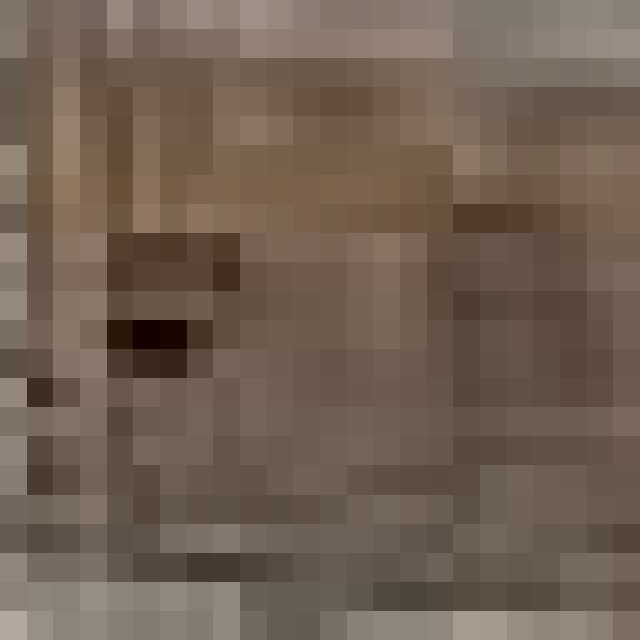

pothole0


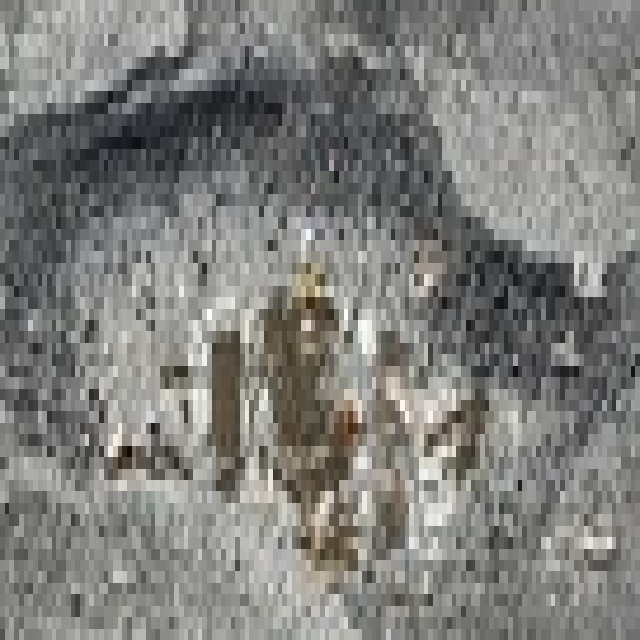

pothole3


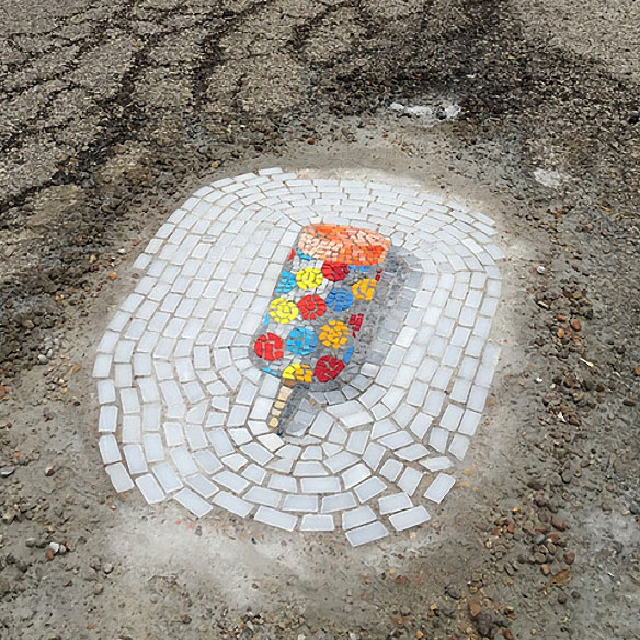

pothole0


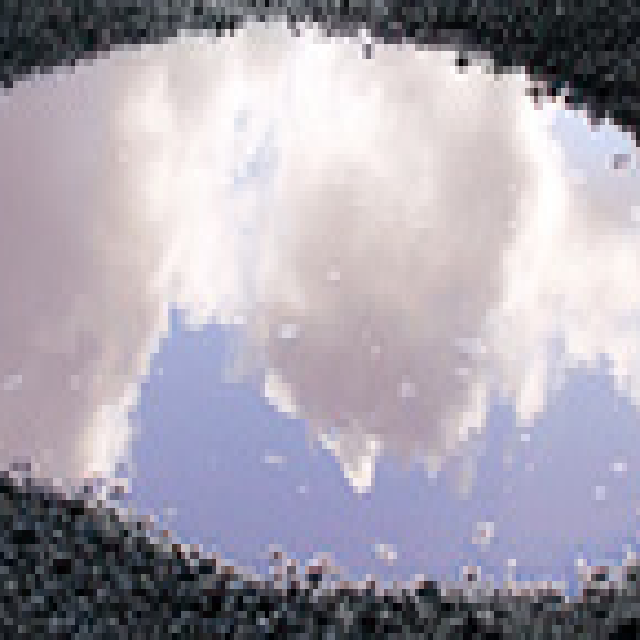

pothole3


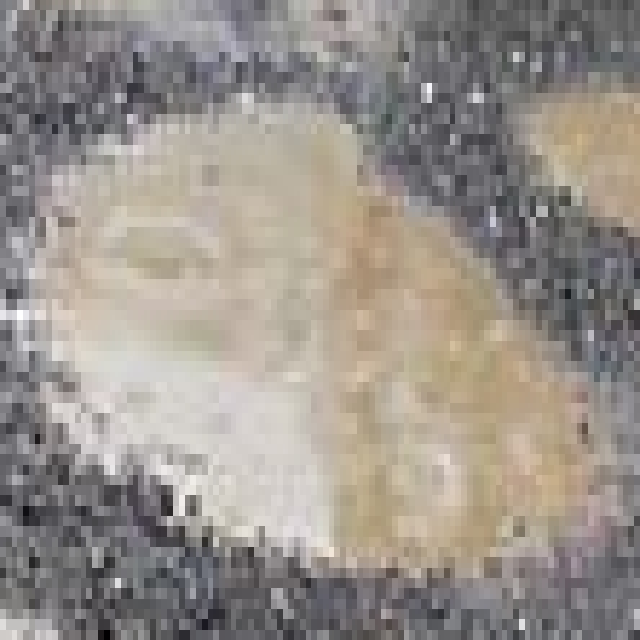

pothole3


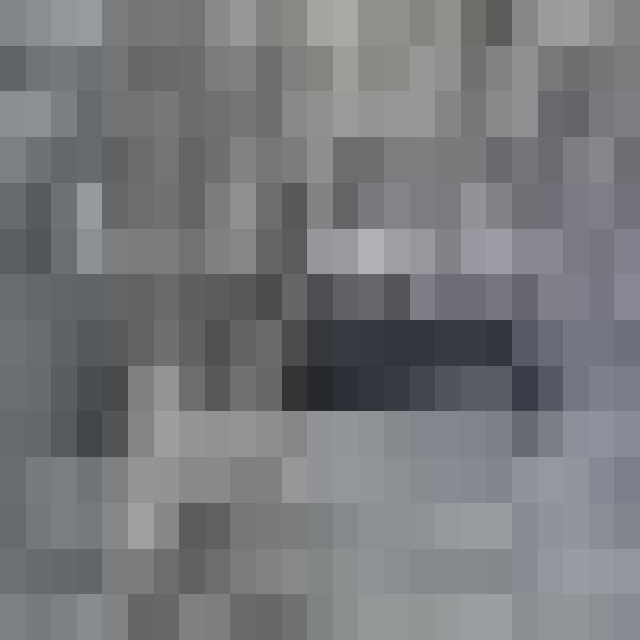

pothole2


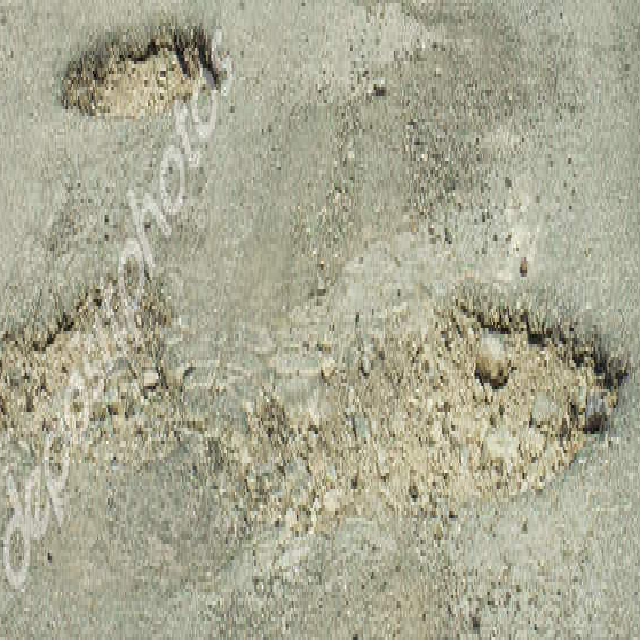

pothole3


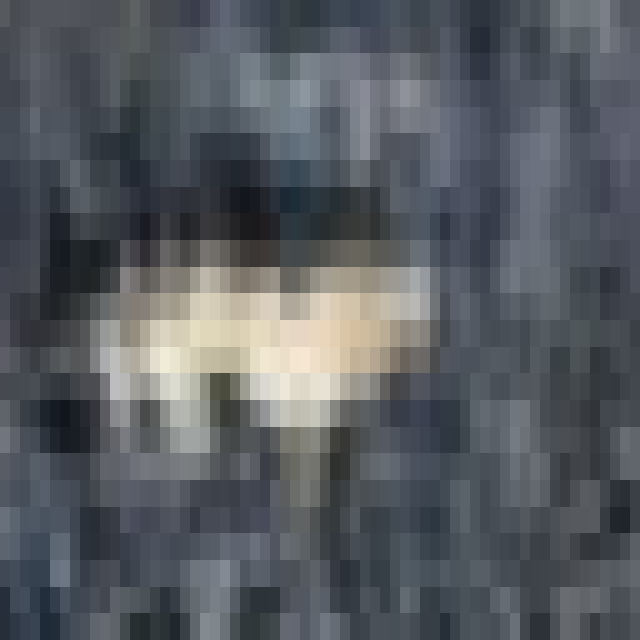

pothole3


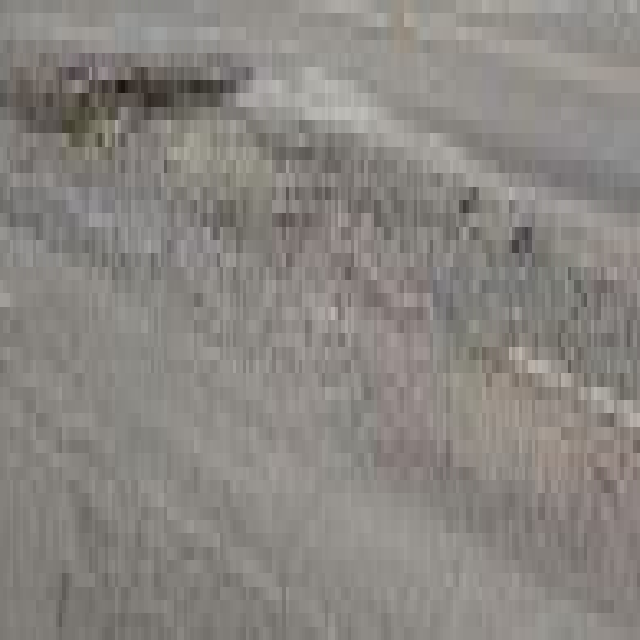

pothole3


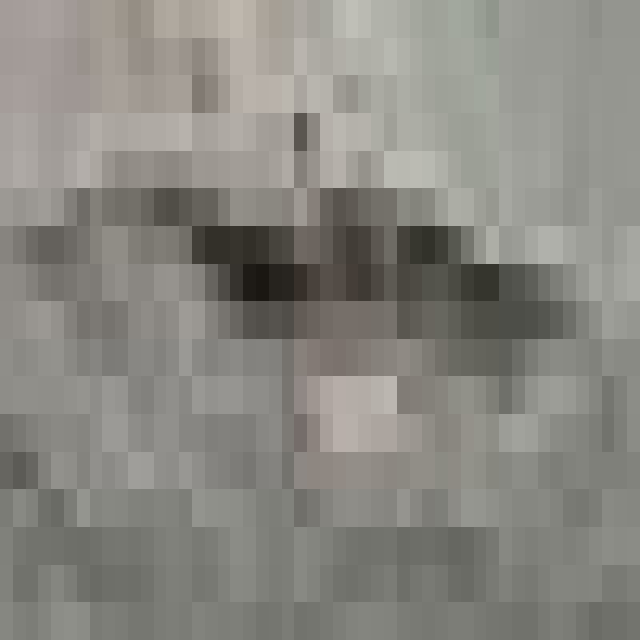

pothole3


In [8]:
import pathlib
import IPython.display as display
from PIL import Image
import os
import random


data_root = pathlib.Path('C:/Users/kles9/Desktop/CmpE257/CmpE257_team_project')
training_objs = list(data_root.glob('training_objects/*.png'))
training_objs = [str(path) for path in training_objs]
random.shuffle(training_objs)

for i in range(10):
    display.display(display.Image(training_objs[i]))
    print(os.path.basename(training_objs[i])[0:8])

## Prepare testing data

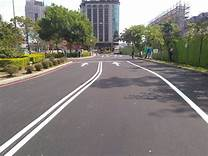

Images\users\kles90105\257_test_data\6n.jpg


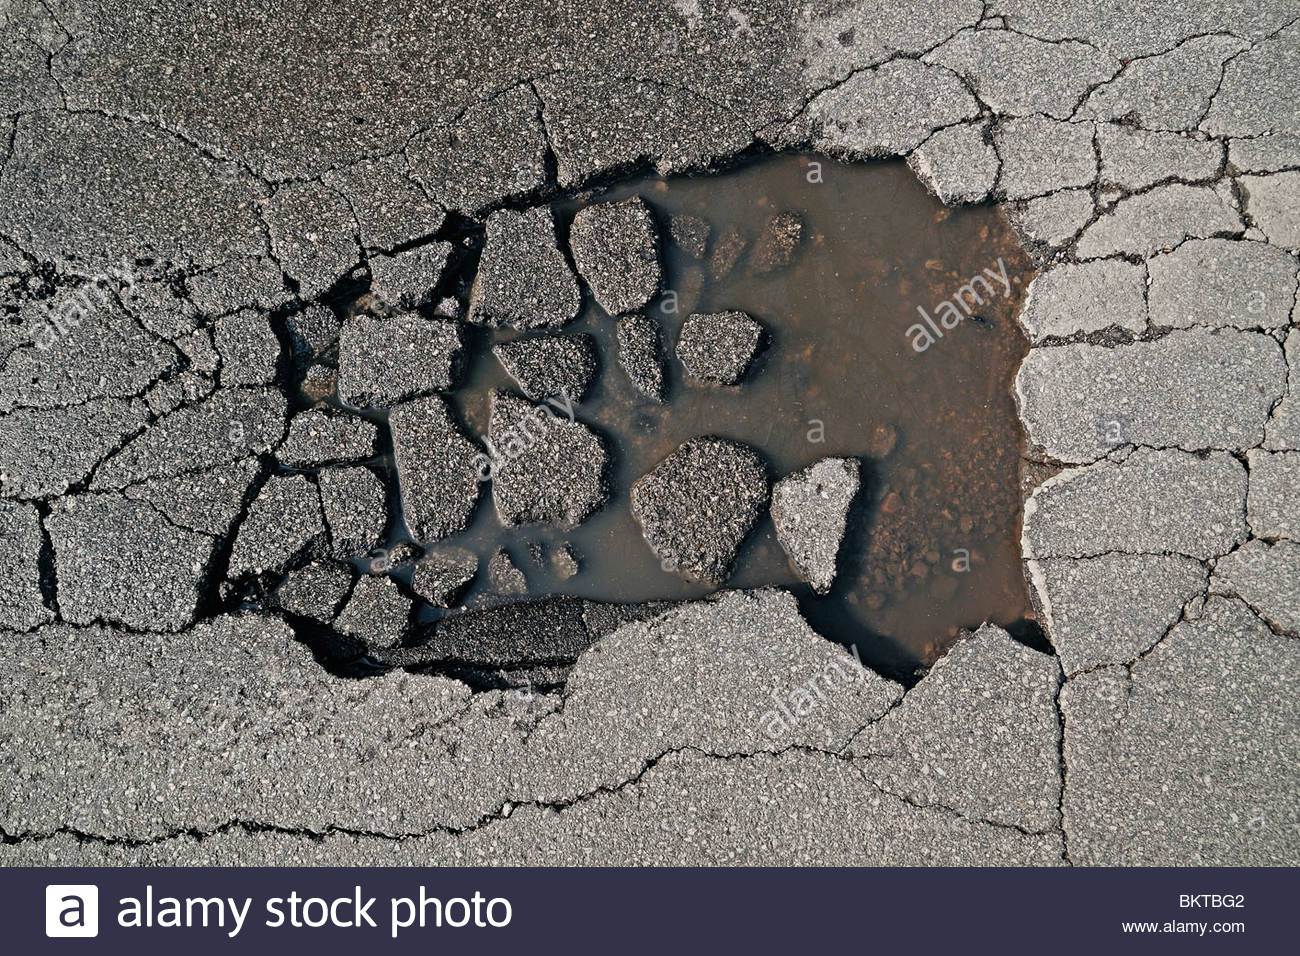

Images\users\kles90105\257_test_data\31p.jpg


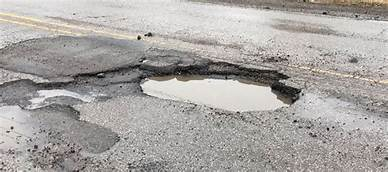

Images\users\kles90105\257_test_data\8p.jpg


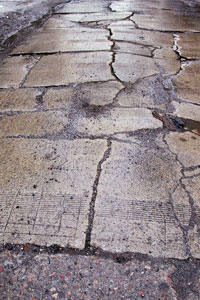

Images\users\kles90105\257_test_data\pothole_pos176.jpg


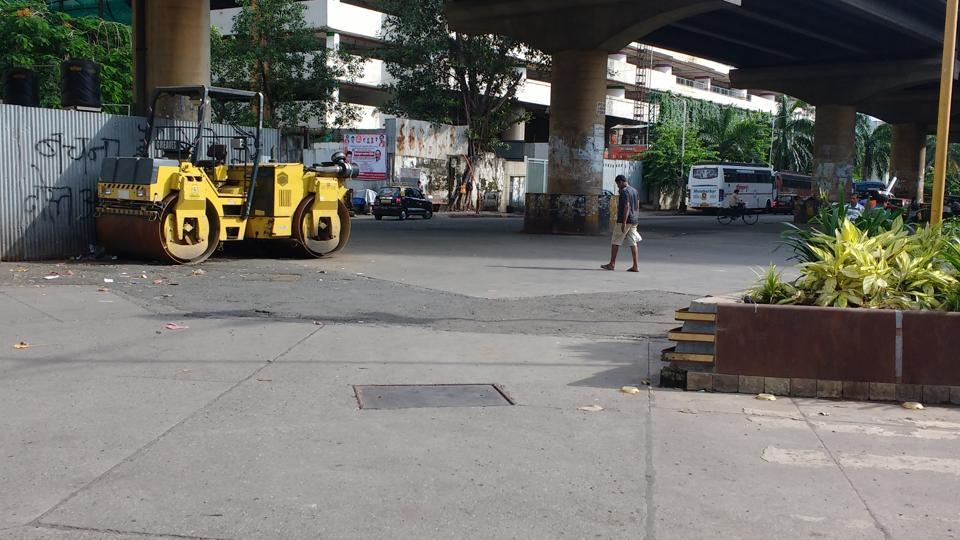

Images\users\kles90105\257_test_data\pothole_neg1.jpg


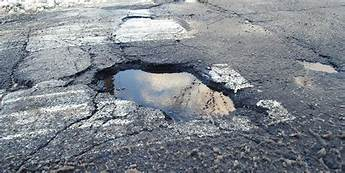

Images\users\kles90105\257_test_data\14p.jpg


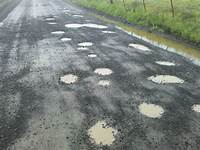

Images\users\kles90105\257_test_data\18p.jpg


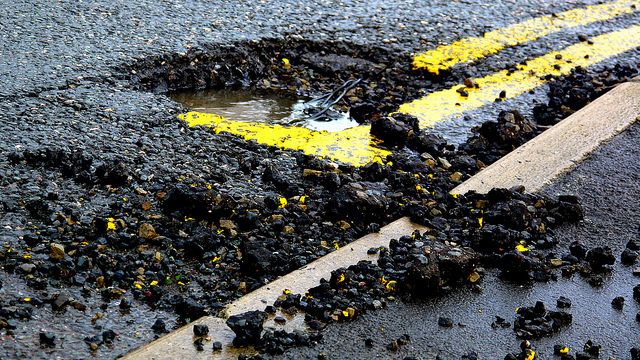

Images\users\kles90105\257_test_data\pothole_pos151.jpg


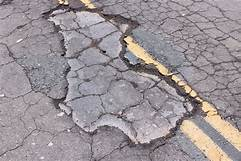

Images\users\kles90105\257_test_data\21p.jpg


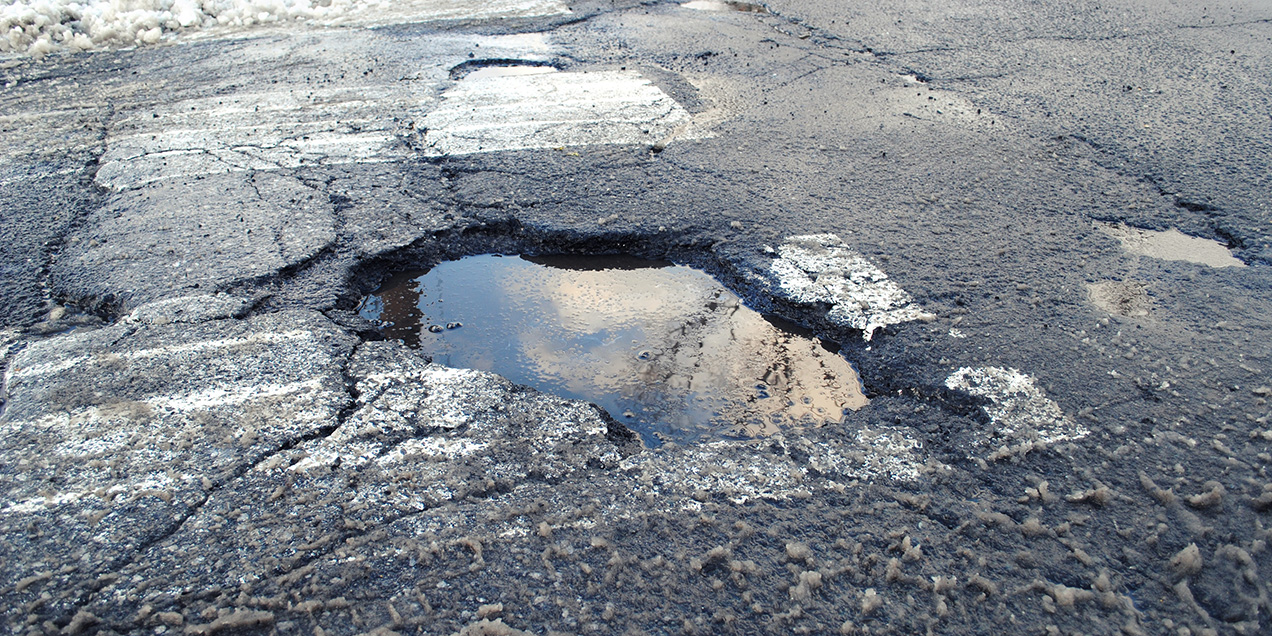

Images\users\kles90105\257_test_data\pothole_pos174.jpg


In [9]:
import pathlib
import IPython.display as display
import random

DATADIR = 'D:/257_data/test_data'
data_root = pathlib.Path(DATADIR)

all_image_paths = list(data_root.glob('*/*/*/*/*.jpg'))
all_image_paths = [str(path) for path in all_image_paths]
all_xml_paths = list(data_root.glob('*/*/*/*/*.xml'))
all_xml_paths = [str(path) for path in all_xml_paths]

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return image_rel
    
for n in range(10):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))


In [10]:
import xml.etree.ElementTree as ET
import numpy as np
from array import *
from PIL import Image
import uuid

def xml_tree(x):
    for child in x:
        if(child.getchildren() == []):
            print(child.tag, ":", child.text)
        else:
            print(child.tag)
            xml_tree(child)

for i in range(len(all_image_paths)):
    tree = ET.parse(all_xml_paths[i])
    root = tree.getroot()
    xml_tree(root)
    print("")

    objs = root.findall("./object")

    url = 'D:/257_data/test_data/Images/users/kles90105/257_test_data/' + root.find("./filename").text

    x_list = []
    y_list = []
    i = 0
    for co in objs:
        print(co.find("./name").text)
        for node in co.findall("./polygon/pt"):
            print("point")
            children = node.getchildren()
            x = children[0].text
            y = children[1].text
            x_list.append(int(float(x)))
            y_list.append(int(float(y)))
            print(int(float(x)), int(float(y)))
        print("top-left", min(x_list), min(y_list))
        print("bottom-right", max(x_list), max(y_list))
        print()
    
        im = Image.open(url) 
        outfile = 'testing_objects/%s-%s.png' % (str(co.find("./name").text), str(uuid.uuid4()))
        im.crop((min(x_list), min(y_list), max(x_list), max(y_list))).resize((640, 640)).save(outfile)
        print("Save as:", outfile)
        print()
        
        x_list = []
        y_list = []


filename : 10n.jpg
folder : users/kles90105//257_test_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 159
ncols : 212
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 20-Apr-2019 19:02:42
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 47
y : 51
pt
x : 172
y : 51
pt
x : 172
y : 129
pt
x : 47
y : 129

pothole0
point
47 51
point
172 51
point
172 129
point
47 129
top-left 47 51
bottom-right 172 129

Save as: testing_objects/pothole0-3b8a8a49-7917-44c7-82b0-9860d43b5777.png

filename : 10p.jpg
folder : users/kles90105//257_test_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 172
ncols : 258
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 20-Apr-2019 19:05:19
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 125
y : 54
pt
x : 168
y : 54
pt
x : 168
y : 76
pt
x : 125
y : 76
object
name : pothole3
dele

Save as: testing_objects/pothole0-555ea1b7-27b7-4367-afe3-e24763b397ec.png

filename : 16p.jpg
folder : users/kles90105//257_test_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 151
ncols : 224
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 20-Apr-2019 19:06:19
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 27
y : 52
pt
x : 203
y : 52
pt
x : 203
y : 121
pt
x : 27
y : 121

pothole1
point
27 52
point
203 52
point
203 121
point
27 121
top-left 27 52
bottom-right 203 121

Save as: testing_objects/pothole1-c34a3dc5-055d-446a-9859-ffbf89515e58.png

filename : 17n.jpg
folder : users/kles90105//257_test_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 768
ncols : 1024
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 20-Apr-2019 19:03:36
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 181
y : 406
pt


filename : 21p.jpg
folder : users/kles90105//257_test_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 161
ncols : 241
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 20-Apr-2019 19:07:27
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 37
y : 7
pt
x : 209
y : 7
pt
x : 209
y : 149
pt
x : 37
y : 149

pothole2
point
37 7
point
209 7
point
209 149
point
37 149
top-left 37 7
bottom-right 209 149

Save as: testing_objects/pothole2-830b24a9-50d0-4c15-ab8f-9e11aede20c2.png

filename : 22p.jpg
folder : users/kles90105//257_test_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 151
ncols : 226
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 20-Apr-2019 19:07:34
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 41
y : 47
pt
x : 183
y : 47
pt
x : 183
y : 93
pt
x : 41
y : 93

pothole3
point
41 47
point
183 47

filename : 5n.jpg
folder : users/kles90105//257_test_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 156
ncols : 194
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 20-Apr-2019 19:02:05
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 42
y : 46
pt
x : 152
y : 46
pt
x : 152
y : 99
pt
x : 42
y : 99

pothole0
point
42 46
point
152 46
point
152 99
point
42 99
top-left 42 46
bottom-right 152 99

Save as: testing_objects/pothole0-88e0e2be-20bd-4948-88e4-8fe370d9021e.png

filename : 5p.jpg
folder : users/kles90105//257_test_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 172
ncols : 229
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 20-Apr-2019 19:04:38
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 53
y : 47
pt
x : 181
y : 47
pt
x : 181
y : 163
pt
x : 53
y : 163

pothole3
point
53 47
point
181 47

Save as: testing_objects/pothole0-94267503-e959-4853-b959-ee5e9d510dc7.png

filename : pothole_neg6.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 2560
ncols : 1920
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:43:02
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 311
y : 1380
pt
x : 1316
y : 1380
pt
x : 1316
y : 1950
pt
x : 311
y : 1950

pothole0
point
311 1380
point
1316 1380
point
1316 1950
point
311 1950
top-left 311 1380
bottom-right 1316 1950

Save as: testing_objects/pothole0-67e6f348-0087-434e-908e-ccea2813081a.png

filename : pothole_pos151.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 360
ncols : 640
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:44:36
id : 0
type : bounding_box
polygo

type : bounding_box
polygon
username : Bert
pt
x : 766
y : 185
pt
x : 540
y : 185
pt
x : 540
y : 149
pt
x : 766
y : 149

pothole3
point
546 666
point
38 666
point
38 355
point
546 355
top-left 38 355
bottom-right 546 666

Save as: testing_objects/pothole3-f6d9cb77-a324-4153-8a35-3302f7bf68f2.png

pothole3
point
999 312
point
360 312
point
360 204
point
999 204
top-left 360 204
bottom-right 999 312

Save as: testing_objects/pothole3-600c557d-4556-47ad-8aca-ef8e1aed3957.png

pothole3
point
766 185
point
540 185
point
540 149
point
766 149
top-left 540 149
bottom-right 766 185

Save as: testing_objects/pothole3-d65c2b32-1838-4e7c-8d83-1c983a364633.png

filename : pothole_pos160.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1462
ncols : 2048
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:46:57
id : 0
type : bounding_box
polygon
username : Bert
pt
x 

Save as: testing_objects/pothole3-eff76a6c-d512-4bbe-931a-854f00610e85.png

filename : pothole_pos173.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 720
ncols : 1280
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:53:09
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 8
y : 442
pt
x : 1127
y : 442
pt
x : 1127
y : 689
pt
x : 8
y : 689

pothole2
point
8 442
point
1127 442
point
1127 689
point
8 689
top-left 8 442
bottom-right 1127 689

Save as: testing_objects/pothole2-1e213bc8-0c24-485e-92b2-eb637a3a9e19.png

filename : pothole_pos174.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 636
ncols : 1272
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:53:14
id : 0
type : bounding_box
polygon
username : Bert
